In [1]:
#import relevant libraries
import os
import subprocess
import numpy as np
import pandas as pd
import sys; sys.path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#set base directory and load in all prediciton accuracy (Pearson correlation) results files
base_dir  = '/Users/elvishadhamala/Documents/yale/HCP_ABCD_preds_results'

#sex-independent model results
surfarea_HCP = np.load(os.path.join(base_dir, 'surfarea_corr_HCP.npy'))
surfarea_ABCD = np.load(os.path.join(base_dir, 'surfarea_corr_ABCD.npy'))

grayvol_HCP = np.load(os.path.join(base_dir, 'grayvol_corr_HCP.npy'))
grayvol_ABCD = np.load(os.path.join(base_dir, 'grayvol_corr_ABCD.npy'))

thick_HCP = np.load(os.path.join(base_dir, 'thick_corr_HCP.npy'))
thick_ABCD = np.load(os.path.join(base_dir, 'thick_corr_ABCD.npy'))

surfarea_norm_HCP = np.load(os.path.join(base_dir, 'surfarea_norm_corr_HCP.npy'))
surfarea_norm_ABCD = np.load(os.path.join(base_dir, 'surfarea_norm_corr_ABCD.npy'))

grayvol_norm_HCP = np.load(os.path.join(base_dir, 'grayvol_norm_corr_HCP.npy'))
grayvol_norm_ABCD = np.load(os.path.join(base_dir, 'grayvol_norm_corr_ABCD.npy'))

thick_norm_HCP = np.load(os.path.join(base_dir, 'thick_norm_corr_HCP.npy'))
thick_norm_ABCD = np.load(os.path.join(base_dir, 'thick_norm_corr_ABCD.npy'))


#sex-specific model results
surfarea_HCP_m = np.load(os.path.join(base_dir, 'surfarea_corr_HCP_m.npy'))
surfarea_HCP_f = np.load(os.path.join(base_dir, 'surfarea_corr_HCP_f.npy'))
surfarea_ABCD_m = np.load(os.path.join(base_dir, 'surfarea_corr_ABCD_m.npy'))
surfarea_ABCD_f = np.load(os.path.join(base_dir, 'surfarea_corr_ABCD_f.npy'))

grayvol_HCP_m = np.load(os.path.join(base_dir, 'grayvol_corr_HCP_m.npy'))
grayvol_HCP_f = np.load(os.path.join(base_dir, 'grayvol_corr_HCP_f.npy'))
grayvol_ABCD_m = np.load(os.path.join(base_dir, 'grayvol_corr_ABCD_m.npy'))
grayvol_ABCD_f = np.load(os.path.join(base_dir, 'grayvol_corr_ABCD_f.npy'))

thick_HCP_m = np.load(os.path.join(base_dir, 'thick_corr_HCP_m.npy'))
thick_HCP_f = np.load(os.path.join(base_dir, 'thick_corr_HCP_f.npy'))
thick_ABCD_m = np.load(os.path.join(base_dir, 'thick_corr_ABCD_m.npy'))
thick_ABCD_f = np.load(os.path.join(base_dir, 'thick_corr_ABCD_f.npy'))


surfarea_norm_HCP_m = np.load(os.path.join(base_dir, 'surfarea_norm_corr_HCP_m.npy'))
surfarea_norm_HCP_f = np.load(os.path.join(base_dir, 'surfarea_norm_corr_HCP_f.npy'))
surfarea_norm_ABCD_m = np.load(os.path.join(base_dir, 'surfarea_norm_corr_ABCD_m.npy'))
surfarea_norm_ABCD_f = np.load(os.path.join(base_dir, 'surfarea_norm_corr_ABCD_f.npy'))

grayvol_norm_HCP_m = np.load(os.path.join(base_dir, 'grayvol_norm_corr_HCP_m.npy'))
grayvol_norm_HCP_f = np.load(os.path.join(base_dir, 'grayvol_norm_corr_HCP_f.npy'))
grayvol_norm_ABCD_m = np.load(os.path.join(base_dir, 'grayvol_norm_corr_ABCD_m.npy'))
grayvol_norm_ABCD_f = np.load(os.path.join(base_dir, 'grayvol_norm_corr_ABCD_f.npy'))

thick_norm_HCP_m = np.load(os.path.join(base_dir, 'thick_norm_corr_HCP_m.npy'))
thick_norm_HCP_f = np.load(os.path.join(base_dir, 'thick_norm_corr_HCP_f.npy'))
thick_norm_ABCD_m = np.load(os.path.join(base_dir, 'thick_norm_corr_ABCD_m.npy'))
thick_norm_ABCD_f = np.load(os.path.join(base_dir, 'thick_norm_corr_ABCD_f.npy'))

In [3]:
#set names of cognitive metrics
cog = ['Fluid Composite', 'Total Composite', 'Crystal Composite',
       'Visual Episodic Memory', 'Cognitive Flexibility (Card Sort)',
       'Inhibition (Flanker)', 'Reading Decoding', 'Vocabulary Comprehension', 
       'Processing Speed', 'Working Memory (List Sorting)']


#set order of test sets (sex-independent - si, sex-specific - ss)
test_si = ['HCP', 'ABCD']
test_ss = ['HCP - M' ,'HCP - F', 'ABCD - M', 'ABCD - F']

In [4]:
#create dfs to store results from sex-independent models
surfarea_results_si = pd.DataFrame()
surfarea_norm_results_si = pd.DataFrame()

#iterate through results_si for all 4 models and concatenate them across cognitive scores and test_si sets
#produces dfs with 4 columns: accuracy, cognition, train, and test - can then be used to plot figs as needed
for i in range(surfarea_HCP.shape[1]):
    for j in range(surfarea_HCP.shape[2]):
        data = pd.DataFrame(surfarea_HCP[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP'
        data['Test'] = test_si[j]
        surfarea_results_si = pd.concat([surfarea_results_si, data], axis='rows')
    
        data = pd.DataFrame(surfarea_ABCD[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD'
        data['Test'] = test_si[j]
        surfarea_results_si = pd.concat([surfarea_results_si, data], axis='rows')

#repeat for other model results
for i in range(surfarea_norm_HCP.shape[1]):
    for j in range(surfarea_norm_HCP.shape[2]):
        data = pd.DataFrame(surfarea_norm_HCP[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP'
        data['Test'] = test_si[j]
        surfarea_norm_results_si = pd.concat([surfarea_norm_results_si, data], axis='rows')
        
        data = pd.DataFrame(surfarea_norm_ABCD[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD'
        data['Test'] = test_si[j]
        surfarea_norm_results_si = pd.concat([surfarea_norm_results_si, data], axis='rows')
        

In [5]:
#repeat for other model results
grayvol_results_si = pd.DataFrame()
grayvol_norm_results_si = pd.DataFrame()

#iterate through results_si for all 4 models and concatenate them across cognitive scores and test_si sets
#produces dfs with 4 columns: accuracy, cognition, train, and test_si - can then be used to plot figs as needed
for i in range(grayvol_HCP.shape[1]):
    for j in range(grayvol_HCP.shape[2]):
        data = pd.DataFrame(grayvol_HCP[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP'
        data['Test'] = test_si[j]
        grayvol_results_si = pd.concat([grayvol_results_si, data], axis='rows')
    
        data = pd.DataFrame(grayvol_ABCD[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD'
        data['Test'] = test_si[j]
        grayvol_results_si = pd.concat([grayvol_results_si, data], axis='rows')

#repeat for other model results
for i in range(grayvol_norm_HCP.shape[1]):
    for j in range(grayvol_norm_HCP.shape[2]):
        data = pd.DataFrame(grayvol_norm_HCP[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP'
        data['Test'] = test_si[j]
        grayvol_norm_results_si = pd.concat([grayvol_norm_results_si, data], axis='rows')
        
        data = pd.DataFrame(grayvol_norm_ABCD[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD'
        data['Test'] = test_si[j]
        grayvol_norm_results_si = pd.concat([grayvol_norm_results_si, data], axis='rows')

In [6]:
#repeat for other model results
thick_results_si = pd.DataFrame()
thick_norm_results_si = pd.DataFrame()

#iterate through results_si for all 4 models and concatenate them across cognitive scores and test_si sets
#produces dfs with 4 columns: accuracy, cognition, train, and test_si - can then be used to plot figs as needed
for i in range(thick_HCP.shape[1]):
    for j in range(thick_HCP.shape[2]):
        data = pd.DataFrame(thick_HCP[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP'
        data['Test'] = test_si[j]
        thick_results_si = pd.concat([thick_results_si, data], axis='rows')
    
        data = pd.DataFrame(thick_ABCD[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD'
        data['Test'] = test_si[j]
        thick_results_si = pd.concat([thick_results_si, data], axis='rows')

#repeat for other model results
for i in range(thick_norm_HCP.shape[1]):
    for j in range(thick_norm_HCP.shape[2]):
        data = pd.DataFrame(thick_norm_HCP[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP'
        data['Test'] = test_si[j]
        thick_norm_results_si = pd.concat([thick_norm_results_si, data], axis='rows')
        
        data = pd.DataFrame(thick_norm_ABCD[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD'
        data['Test'] = test_si[j]
        thick_norm_results_si = pd.concat([thick_norm_results_si, data], axis='rows')

In [7]:
#create dfs to store results from sex-specific models
surfarea_results_ss = pd.DataFrame()
surfarea_norm_results_ss = pd.DataFrame()

#iterate through results_ss for all 4 models and concatenate them across cognitive scores and test_ss sets
#produces dfs with 4 columns: accuracy, cognition, train, and test_ss - can then be used to plot figs as needed
for i in range(surfarea_HCP_m.shape[1]):
    for j in range(surfarea_HCP_m.shape[2]):
        data = pd.DataFrame(surfarea_HCP_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - M'
        data['Test'] = test_ss[j]
        surfarea_results_ss = pd.concat([surfarea_results_ss, data], axis='rows')
        
        data = pd.DataFrame(surfarea_HCP_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - F'
        data['Test'] = test_ss[j]
        surfarea_results_ss = pd.concat([surfarea_results_ss, data], axis='rows')
        
        data = pd.DataFrame(surfarea_ABCD_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - M'
        data['Test'] = test_ss[j]
        surfarea_results_ss = pd.concat([surfarea_results_ss, data], axis='rows')
        
        data = pd.DataFrame(surfarea_ABCD_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - F'
        data['Test'] = test_ss[j]
        surfarea_results_ss = pd.concat([surfarea_results_ss, data], axis='rows')

#repeat for other model results
for i in range(surfarea_norm_HCP_m.shape[1]):
    for j in range(surfarea_norm_HCP_m.shape[2]):
        data = pd.DataFrame(surfarea_norm_HCP_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - M'
        data['Test'] = test_ss[j]
        surfarea_norm_results_ss = pd.concat([surfarea_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(surfarea_norm_HCP_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - F'
        data['Test'] = test_ss[j]
        surfarea_norm_results_ss = pd.concat([surfarea_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(surfarea_norm_ABCD_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - M'
        data['Test'] = test_ss[j]
        surfarea_norm_results_ss = pd.concat([surfarea_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(surfarea_norm_ABCD_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - F'
        data['Test'] = test_ss[j]
        surfarea_norm_results_ss = pd.concat([surfarea_norm_results_ss, data], axis='rows')
        

In [8]:
#repeat for other sex-specific model results
grayvol_results_ss = pd.DataFrame()
grayvol_norm_results_ss = pd.DataFrame()

for i in range(grayvol_HCP_m.shape[1]):
    for j in range(grayvol_HCP_m.shape[2]):
        data = pd.DataFrame(grayvol_HCP_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - M'
        data['Test'] = test_ss[j]
        grayvol_results_ss = pd.concat([grayvol_results_ss, data], axis='rows')
        
        data = pd.DataFrame(grayvol_HCP_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - F'
        data['Test'] = test_ss[j]
        grayvol_results_ss = pd.concat([grayvol_results_ss, data], axis='rows')
        
        data = pd.DataFrame(grayvol_ABCD_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - M'
        data['Test'] = test_ss[j]
        grayvol_results_ss = pd.concat([grayvol_results_ss, data], axis='rows')
        
        data = pd.DataFrame(grayvol_ABCD_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - F'
        data['Test'] = test_ss[j]
        grayvol_results_ss = pd.concat([grayvol_results_ss, data], axis='rows')
        
for i in range(grayvol_norm_HCP_m.shape[1]):
    for j in range(grayvol_norm_HCP_m.shape[2]):
        data = pd.DataFrame(grayvol_norm_HCP_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - M'
        data['Test'] = test_ss[j]
        grayvol_norm_results_ss = pd.concat([grayvol_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(grayvol_norm_HCP_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - F'
        data['Test'] = test_ss[j]
        grayvol_norm_results_ss = pd.concat([grayvol_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(grayvol_norm_ABCD_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - M'
        data['Test'] = test_ss[j]
        grayvol_norm_results_ss = pd.concat([grayvol_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(grayvol_norm_ABCD_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - F'
        data['Test'] = test_ss[j]
        grayvol_norm_results_ss = pd.concat([grayvol_norm_results_ss, data], axis='rows')
        
        

In [9]:
#repeat for other sex-specific model results
thick_results_ss = pd.DataFrame()
thick_norm_results_ss = pd.DataFrame()

for i in range(thick_HCP_m.shape[1]):
    for j in range(thick_HCP_m.shape[2]):
        data = pd.DataFrame(thick_HCP_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - M'
        data['Test'] = test_ss[j]
        thick_results_ss = pd.concat([thick_results_ss, data], axis='rows')
        
        data = pd.DataFrame(thick_HCP_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - F'
        data['Test'] = test_ss[j]
        thick_results_ss = pd.concat([thick_results_ss, data], axis='rows')
        
        data = pd.DataFrame(thick_ABCD_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - M'
        data['Test'] = test_ss[j]
        thick_results_ss = pd.concat([thick_results_ss, data], axis='rows')
        
        data = pd.DataFrame(thick_ABCD_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - F'
        data['Test'] = test_ss[j]
        thick_results_ss = pd.concat([thick_results_ss, data], axis='rows')
        
for i in range(thick_norm_HCP_m.shape[1]):
    for j in range(thick_norm_HCP_m.shape[2]):
        data = pd.DataFrame(thick_norm_HCP_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - M'
        data['Test'] = test_ss[j]
        thick_norm_results_ss = pd.concat([thick_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(thick_norm_HCP_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'HCP - F'
        data['Test'] = test_ss[j]
        thick_norm_results_ss = pd.concat([thick_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(thick_norm_ABCD_m[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - M'
        data['Test'] = test_ss[j]
        thick_norm_results_ss = pd.concat([thick_norm_results_ss, data], axis='rows')
        
        data = pd.DataFrame(thick_norm_ABCD_f[:,i,j])
        data.columns = ['Accuracy']
        data['Cognition'] = cog[i]
        data['Train'] = 'ABCD - F'
        data['Test'] = test_ss[j]
        thick_norm_results_ss = pd.concat([thick_norm_results_ss, data], axis='rows')
        

In [10]:
surfarea_results_si['ICV'] = 'Raw'
surfarea_norm_results_si['ICV'] = 'Proportion-Corrected'

grayvol_results_si['ICV'] = 'Raw'
grayvol_norm_results_si['ICV'] = 'Proportion-Corrected'

thick_results_si['ICV'] = 'Raw'
thick_norm_results_si['ICV'] = 'Proportion-Corrected'

surfarea_results_ss['ICV'] = 'Raw'
surfarea_norm_results_ss['ICV'] = 'Proportion-Corrected'

grayvol_results_ss['ICV'] = 'Raw'
grayvol_norm_results_ss['ICV'] = 'Proportion-Corrected'

thick_results_ss['ICV'] = 'Raw'
thick_norm_results_ss['ICV'] = 'Proportion-Corrected'

In [11]:
sa_results_si = pd.concat([surfarea_results_si, surfarea_norm_results_si], axis='rows')
sa_results_ss = pd.concat([surfarea_results_ss, surfarea_norm_results_ss], axis='rows')

gm_results_si = pd.concat([grayvol_results_si, grayvol_norm_results_si], axis='rows')
gm_results_ss = pd.concat([grayvol_results_ss, grayvol_norm_results_ss], axis='rows')

ct_results_si = pd.concat([thick_results_si, thick_norm_results_si], axis='rows')
ct_results_ss = pd.concat([thick_results_ss, thick_norm_results_ss], axis='rows')

In [12]:
#create dataframe to store mean results across cognitive scores for different training sets for sex-independent models
avg_surfarea_si = [np.mean(np.mean(surfarea_HCP, axis=0), axis=0),
               np.mean(np.mean(surfarea_ABCD, axis=0), axis=0)]

avg_surfarea_si = pd.DataFrame(avg_surfarea_si)
avg_surfarea_si.columns = test_si
avg_surfarea_si.index = test_si

#repeat for other models
avg_surfarea_norm_si = [np.mean(np.mean(surfarea_norm_HCP, axis=0), axis=0),
               np.mean(np.mean(surfarea_norm_ABCD, axis=0), axis=0)]

avg_surfarea_norm_si = pd.DataFrame(avg_surfarea_norm_si)
avg_surfarea_norm_si.columns = test_si
avg_surfarea_norm_si.index = test_si

#repeat for other models
avg_grayvol_si = [np.mean(np.mean(grayvol_HCP, axis=0), axis=0),
               np.mean(np.mean(grayvol_ABCD, axis=0), axis=0)]

avg_grayvol_si = pd.DataFrame(avg_grayvol_si)
avg_grayvol_si.columns = test_si
avg_grayvol_si.index = test_si

#repeat for other models
avg_grayvol_norm_si = [np.mean(np.mean(grayvol_norm_HCP, axis=0), axis=0),
               np.mean(np.mean(grayvol_norm_ABCD, axis=0), axis=0)]

avg_grayvol_norm_si = pd.DataFrame(avg_grayvol_norm_si)
avg_grayvol_norm_si.columns = test_si
avg_grayvol_norm_si.index = test_si

#repeat for other models
avg_thick_si = [np.mean(np.mean(thick_HCP, axis=0), axis=0),
               np.mean(np.mean(thick_ABCD, axis=0), axis=0)]

avg_thick_si = pd.DataFrame(avg_thick_si)
avg_thick_si.columns = test_si
avg_thick_si.index = test_si

#repeat for other models
avg_thick_norm_si = [np.mean(np.mean(thick_norm_HCP, axis=0), axis=0),
               np.mean(np.mean(thick_norm_ABCD, axis=0), axis=0)]

avg_thick_norm_si = pd.DataFrame(avg_thick_norm_si)
avg_thick_norm_si.columns = test_si
avg_thick_norm_si.index = test_si

In [13]:
#create dataframe to store mean results across cognitive scores for different training sets for sex-specific models
avg_surfarea_ss = [np.mean(np.mean(surfarea_HCP_m, axis=0), axis=0),
               np.mean(np.mean(surfarea_HCP_f, axis=0), axis=0),
               np.mean(np.mean(surfarea_ABCD_m, axis=0), axis=0),
               np.mean(np.mean(surfarea_ABCD_f, axis=0), axis=0)]

avg_surfarea_ss = pd.DataFrame(avg_surfarea_ss)
avg_surfarea_ss.columns = test_ss
avg_surfarea_ss.index = test_ss

#repeat for other models
avg_surfarea_norm_ss = [np.mean(np.mean(surfarea_norm_HCP_m, axis=0), axis=0),
               np.mean(np.mean(surfarea_norm_HCP_f, axis=0), axis=0),
               np.mean(np.mean(surfarea_norm_ABCD_m, axis=0), axis=0),
               np.mean(np.mean(surfarea_norm_ABCD_f, axis=0), axis=0)]

avg_surfarea_norm_ss = pd.DataFrame(avg_surfarea_norm_ss)
avg_surfarea_norm_ss.columns = test_ss
avg_surfarea_norm_ss.index = test_ss

#repeat for other models
avg_grayvol_ss = [np.mean(np.mean(grayvol_HCP_m, axis=0), axis=0),
               np.mean(np.mean(grayvol_HCP_f, axis=0), axis=0),
               np.mean(np.mean(grayvol_ABCD_m, axis=0), axis=0),
               np.mean(np.mean(grayvol_ABCD_f, axis=0), axis=0)]

avg_grayvol_ss = pd.DataFrame(avg_grayvol_ss)
avg_grayvol_ss.columns = test_ss
avg_grayvol_ss.index = test_ss

#repeat for other models
avg_grayvol_norm_ss = [np.mean(np.mean(grayvol_norm_HCP_m, axis=0), axis=0),
               np.mean(np.mean(grayvol_norm_HCP_f, axis=0), axis=0),
               np.mean(np.mean(grayvol_norm_ABCD_m, axis=0), axis=0),
               np.mean(np.mean(grayvol_norm_ABCD_f, axis=0), axis=0)]

avg_grayvol_norm_ss = pd.DataFrame(avg_grayvol_norm_ss)
avg_grayvol_norm_ss.columns = test_ss
avg_grayvol_norm_ss.index = test_ss

#repeat for other models
avg_thick_ss = [np.mean(np.mean(thick_HCP_m, axis=0), axis=0),
               np.mean(np.mean(thick_HCP_f, axis=0), axis=0),
               np.mean(np.mean(thick_ABCD_m, axis=0), axis=0),
               np.mean(np.mean(thick_ABCD_f, axis=0), axis=0)]

avg_thick_ss = pd.DataFrame(avg_thick_ss)
avg_thick_ss.columns = test_ss
avg_thick_ss.index = test_ss

#repeat for other models
avg_thick_norm_ss = [np.mean(np.mean(thick_norm_HCP_m, axis=0), axis=0),
               np.mean(np.mean(thick_norm_HCP_f, axis=0), axis=0),
               np.mean(np.mean(thick_norm_ABCD_m, axis=0), axis=0),
               np.mean(np.mean(thick_norm_ABCD_f, axis=0), axis=0)]

avg_thick_norm_ss = pd.DataFrame(avg_thick_norm_ss)
avg_thick_norm_ss.columns = test_ss
avg_thick_norm_ss.index = test_ss

In [26]:
#fluid - 0 --> 4
#total - 1 --> 0
#crystal - 2 --> 1
#visual episodic mem - 3 --> 5
#cog flex 4 --> 6
#flanker 5 --> 7
#reading 6 --> 2
#vocab 7 --> 3
#proc speed 8 --> 8
#working mem 9 --> 9
cog = ['Fluid Composite', 'Total Composite', 'Crystal Composite',
       'Visual Episodic Memory', 'Cognitive Flexibility (Card Sort)',
       'Inhibition (Flanker)', 'Reading Decoding', 'Vocabulary Comprehension', 
       'Processing Speed', 'Working Memory (List Sorting)']

new_order = [1,2,6,7,0,3,4,5,8,9]
reorder_cog = [cog[i] for i in new_order]

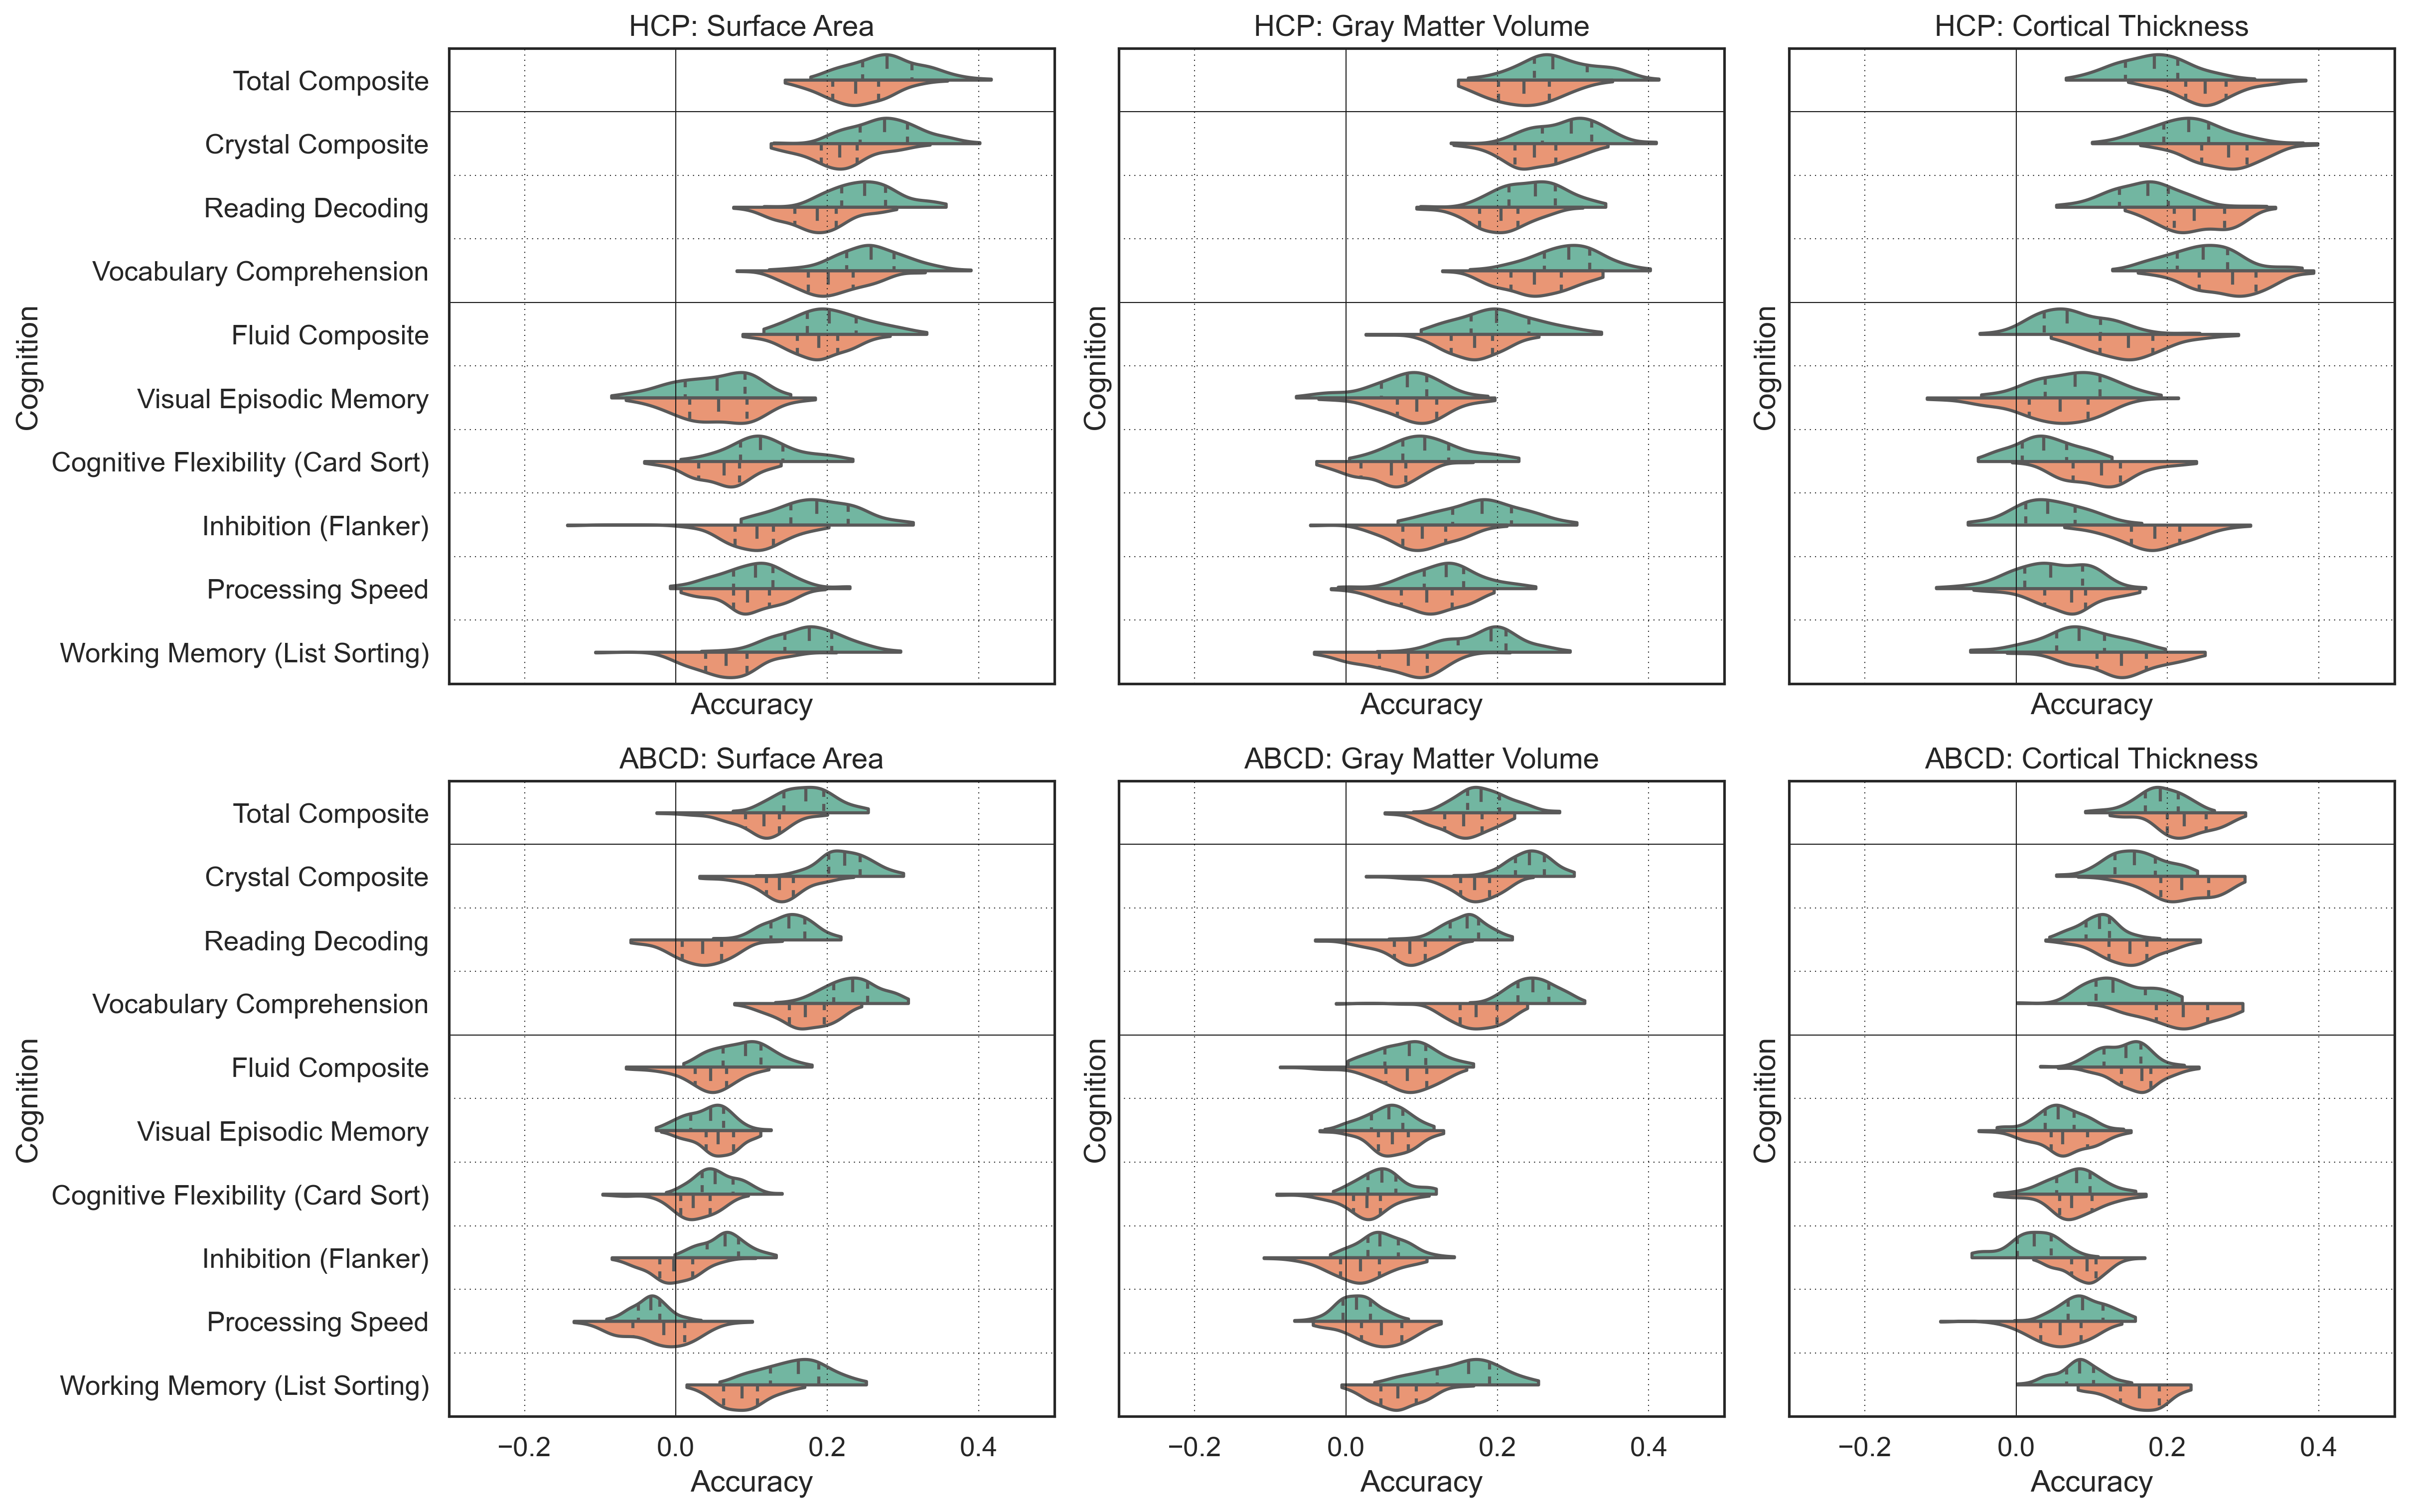

In [67]:
nrows = 2
ncols = 3
dpi = 300
tight = True
#sns.reset_orig

sns.set_style(style="white")
#sns.set(font_scale=1.2)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, sharex=True, figsize=[16, 10], dpi=dpi, constrained_layout=tight)
sns.set_style(style="white")
#ax[0] = sns.violinplot(ax=ax[0], x="acc", y="cog", hue="Sex", data=sa_df[sa_df.Parcellations=='Population-Level'], 
                       #split=True, scale="width", orient='h', palette='Set1')
    
cmap = 'Set2'
x = 'Accuracy'
y = 'Cognition'
hue = 'ICV'
scale='width'
orient = 'h'
split = True
inner = 'quartile'
cut=0
order = reorder_cog


data1 = sa_results_si[(sa_results_si.Train=='HCP') & (sa_results_si.Test=='HCP')]
data2 = gm_results_si[(gm_results_si.Train=='HCP') & (gm_results_si.Test=='HCP')]
data3 = ct_results_si[(ct_results_si.Train=='HCP') & (ct_results_si.Test=='HCP')]

data4 = sa_results_si[(sa_results_si.Train=='ABCD') & (sa_results_si.Test=='ABCD')]
data5 = gm_results_si[(gm_results_si.Train=='ABCD') & (gm_results_si.Test=='ABCD')]
data6 = ct_results_si[(ct_results_si.Train=='ABCD') & (ct_results_si.Test=='ABCD')]


ax[0,0] = sns.violinplot(ax=ax[0,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data1, order=order, inner=inner, cut=cut)

ax[0,1] = sns.violinplot(ax=ax[0,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data2, order=order, inner=inner, cut=cut)


ax[0,2] = sns.violinplot(ax=ax[0,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data3, order=order, inner=inner, cut=cut)

ax[1,0] = sns.violinplot(ax=ax[1,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data4, order=order, inner=inner, cut=cut)


ax[1,1] = sns.violinplot(ax=ax[1,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data5, order=order, inner=inner, cut=cut)

ax[1,2] = sns.violinplot(ax=ax[1,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data6, order=order, inner=inner, cut=cut)


fontsize=14


ax[0,0].set_title('HCP: Surface Area', fontsize=fontsize)
ax[0,1].set_title('HCP: Gray Matter Volume', fontsize=fontsize)
ax[0,2].set_title('HCP: Cortical Thickness', fontsize=fontsize)

ax[1,0].set_title('ABCD: Surface Area', fontsize=fontsize)
ax[1,1].set_title('ABCD: Gray Matter Volume', fontsize=fontsize)
ax[1,2].set_title('ABCD: Cortical Thickness', fontsize=fontsize)


lw = .5
color = 'k'

for i in range(nrows):
    for j in range(ncols):

        ax[i,j].axhline(0.5,  linewidth=lw, color=color, dashes=(1, 0))
        ax[i,j].axhline(1.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(2.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(3.5,  linewidth=lw, color=color, dashes=(1, 0))
        ax[i,j].axhline(4.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(5.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(6.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(7.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(8.5,  linewidth=lw, color=color, dashes=(1, 4))
        
        ax[i,j].axvline(0.2,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axvline(-.2,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axvline(0.0,  linewidth=lw, color=color, dashes=(1, 0))
        ax[i,j].axvline(0.4,  linewidth=lw, color=color, dashes=(1, 4))
        #ax[i,j].xticks(labels, rotation='vertical')
        
        ax[i,j].get_legend().remove()
        
        #ax[i,j].legend(loc='lower left', fontsize=10, frameon=False)
        ax[i,j].set(xlim=(-0.3, 0.5))
                    
plt.savefig(os.path.join(base_dir, 'manuscript_figs/preds_si.png'), dpi=900, bbox_inches="tight") 



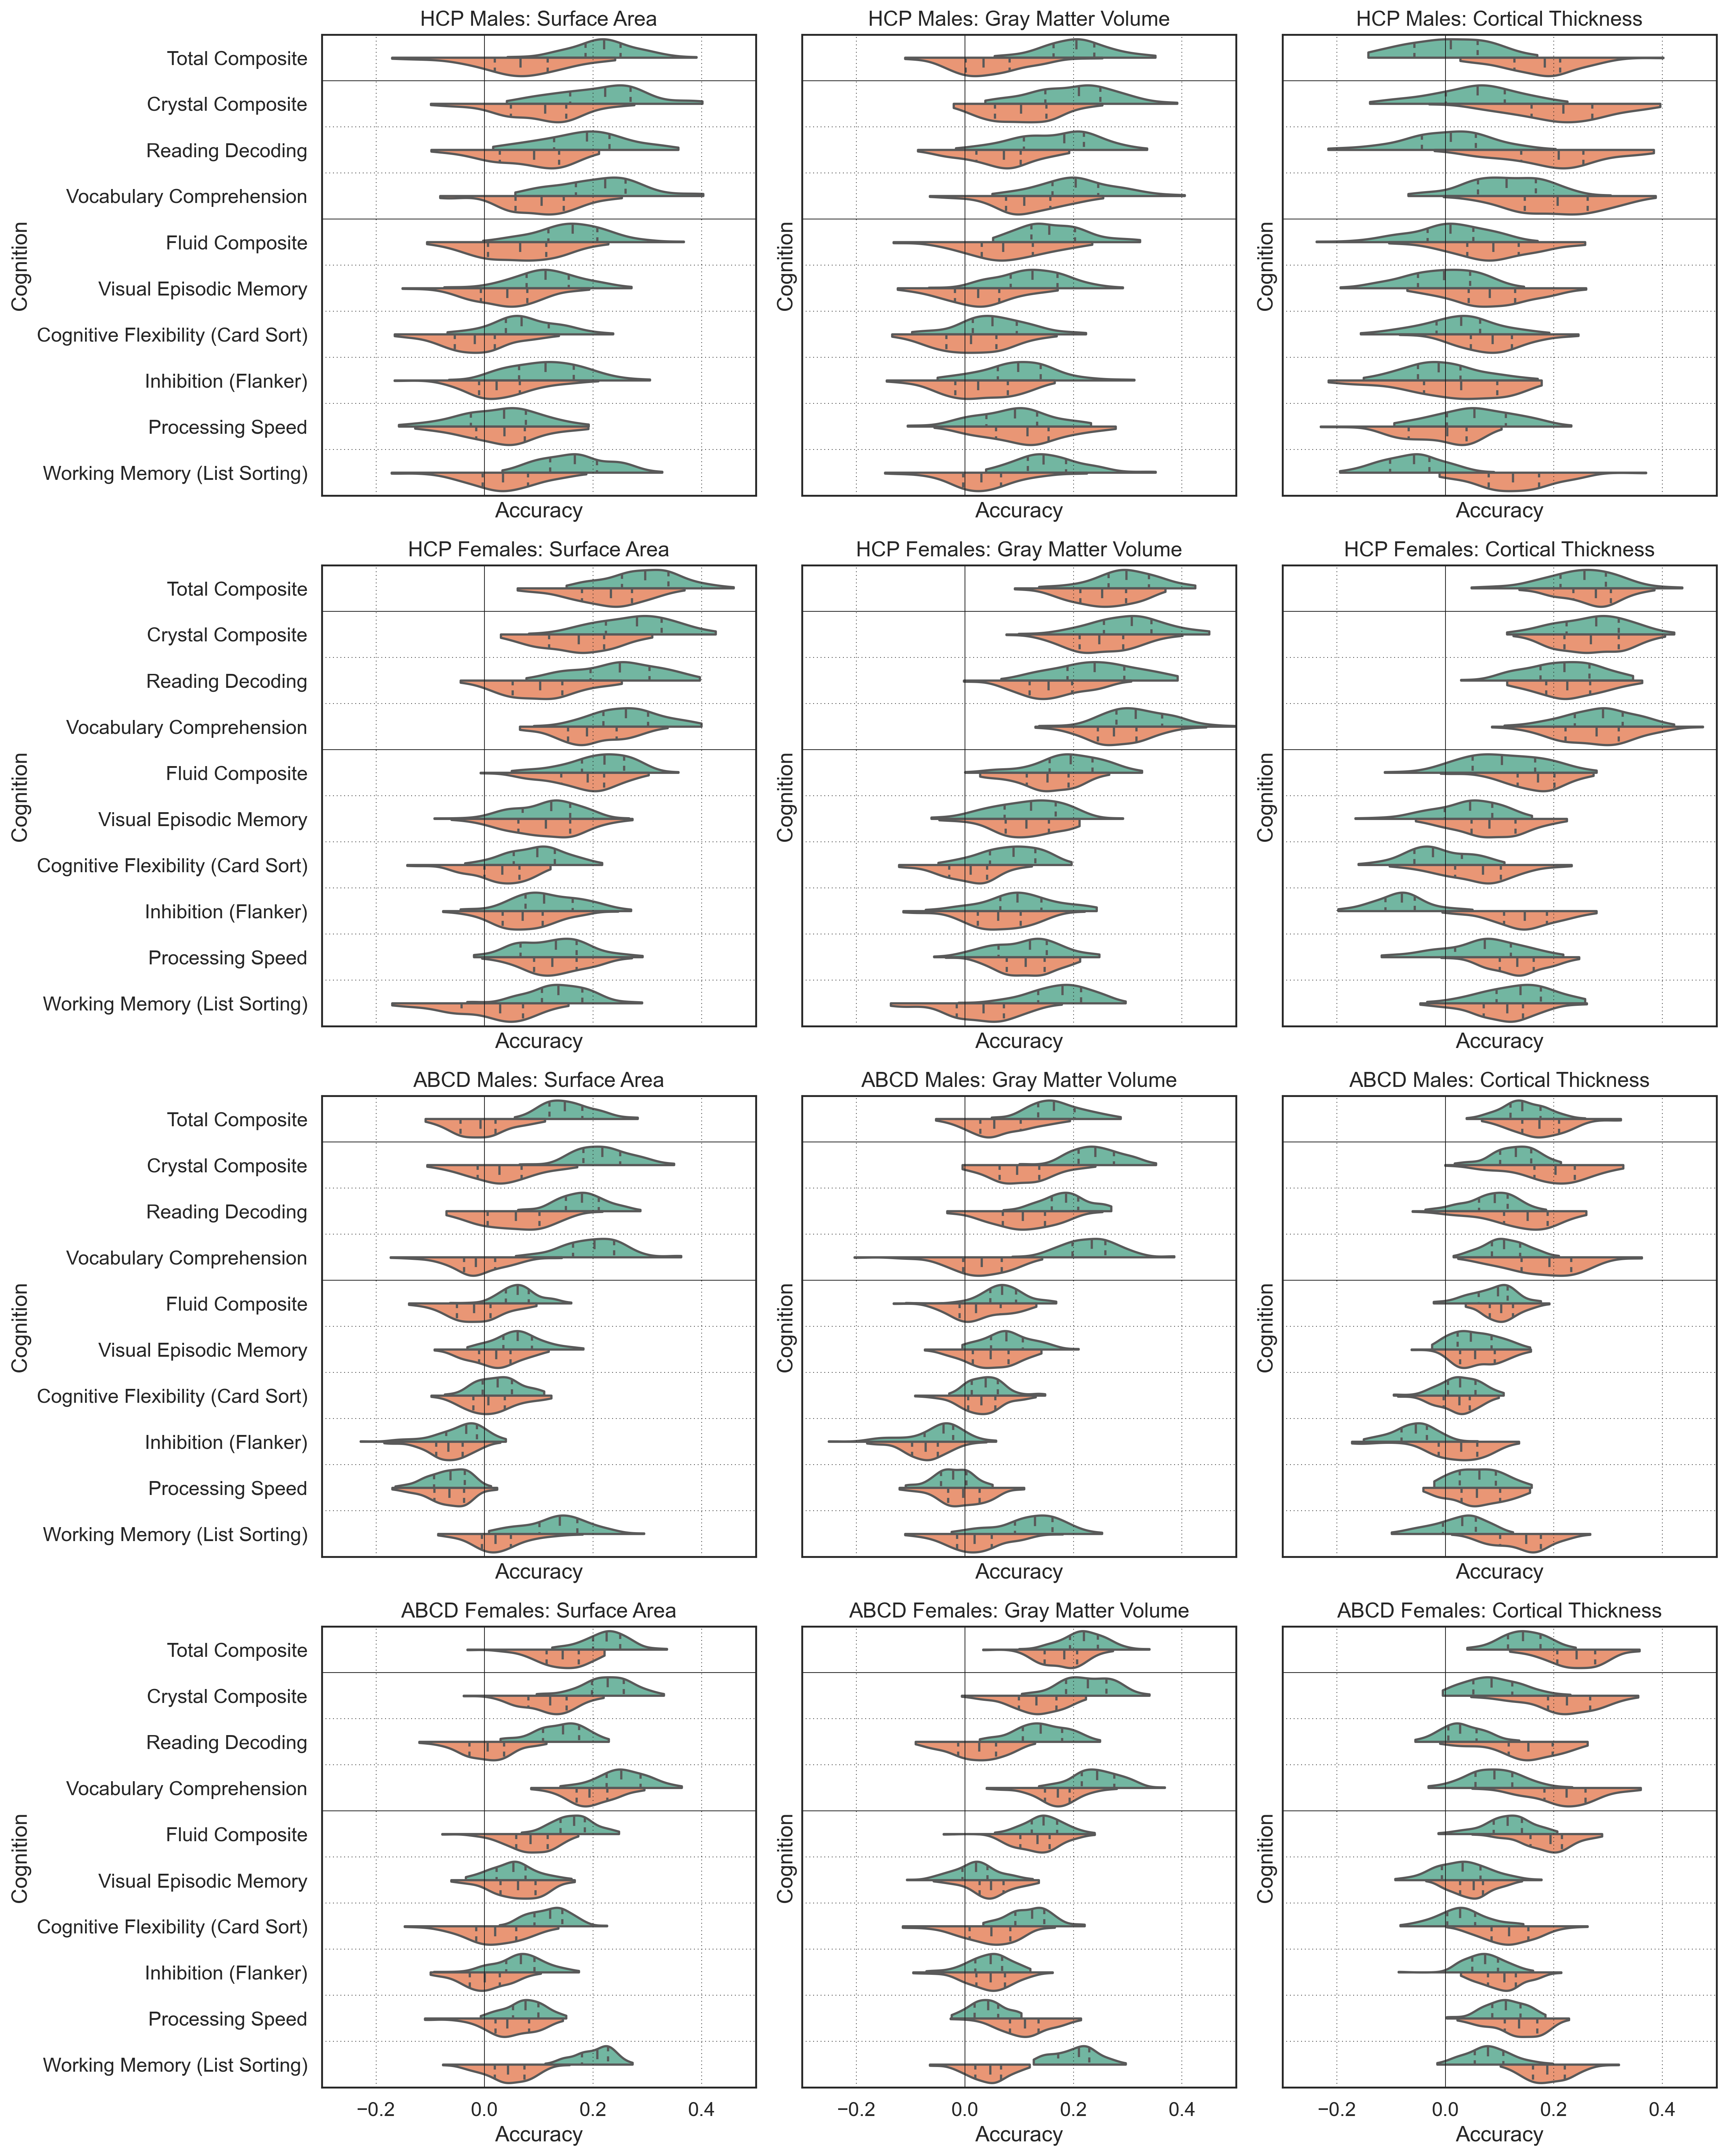

In [66]:
nrows = 4
ncols = 3
dpi = 300
tight = True

sns.set_style(style="white")
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, sharex=True, figsize=[16, 20], dpi=dpi, constrained_layout=tight)

#ax[0] = sns.violinplot(ax=ax[0], x="acc", y="cog", hue="Sex", data=sa_df[sa_df.Parcellations=='Population-Level'], 
                       #split=True, scale="width", orient='h', palette='Set1')
    
cmap = 'Set2'
x = 'Accuracy'
y = 'Cognition'
hue = 'ICV'
scale='width'
orient = 'h'
split = True
inner = 'quartile'
cut=0
order = reorder_cog

data1 = sa_results_ss[(sa_results_ss.Train=='HCP - M') & (sa_results_ss.Test=='HCP - M')]
data2 = gm_results_ss[(gm_results_ss.Train=='HCP - M') & (gm_results_ss.Test=='HCP - M')]
data3 = ct_results_ss[(ct_results_ss.Train=='HCP - M') & (ct_results_ss.Test=='HCP - M')]

data4 = sa_results_ss[(sa_results_ss.Train=='HCP - F') & (sa_results_ss.Test=='HCP - F')]
data5 = gm_results_ss[(gm_results_ss.Train=='HCP - F') & (gm_results_ss.Test=='HCP - F')]
data6 = ct_results_ss[(ct_results_ss.Train=='HCP - F') & (ct_results_ss.Test=='HCP - F')]

data7 = sa_results_ss[(sa_results_ss.Train=='ABCD - M') & (sa_results_ss.Test=='ABCD - M')]
data8 = gm_results_ss[(gm_results_ss.Train=='ABCD - M') & (gm_results_ss.Test=='ABCD - M')]
data9 = ct_results_ss[(ct_results_ss.Train=='ABCD - M') & (ct_results_ss.Test=='ABCD - M')]

data10 = sa_results_ss[(sa_results_ss.Train=='ABCD - F') & (sa_results_ss.Test=='ABCD - F')]
data11 = gm_results_ss[(gm_results_ss.Train=='ABCD - F') & (gm_results_ss.Test=='ABCD - F')]
data12 = ct_results_ss[(ct_results_ss.Train=='ABCD - F') & (ct_results_ss.Test=='ABCD - F')]


ax[0,0] = sns.violinplot(ax=ax[0,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data1, order=order, inner=inner, cut=cut)

ax[0,1] = sns.violinplot(ax=ax[0,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data2, order=order, inner=inner, cut=cut)


ax[0,2] = sns.violinplot(ax=ax[0,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data3, order=order, inner=inner, cut=cut)


ax[1,0] = sns.violinplot(ax=ax[1,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data4, order=order, inner=inner, cut=cut)


ax[1,1] = sns.violinplot(ax=ax[1,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data5, order=order, inner=inner, cut=cut)

ax[1,2] = sns.violinplot(ax=ax[1,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data6, order=order, inner=inner, cut=cut)


ax[2,0] = sns.violinplot(ax=ax[2,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data7, order=order, inner=inner, cut=cut)

ax[2,1] = sns.violinplot(ax=ax[2,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data8, order=order, inner=inner, cut=cut)


ax[2,2] = sns.violinplot(ax=ax[2,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data9, order=order, inner=inner, cut=cut)

ax[3,0] = sns.violinplot(ax=ax[3,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data10, order=order, inner=inner, cut=cut)


ax[3,1] = sns.violinplot(ax=ax[3,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data11, order=order, inner=inner, cut=cut)

ax[3,2] = sns.violinplot(ax=ax[3,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap, split=split,
                       data=data12, order=order, inner=inner, cut=cut)


fontsize=14


ax[0,0].set_title('HCP Males: Surface Area', fontsize=fontsize)
ax[0,1].set_title('HCP Males: Gray Matter Volume', fontsize=fontsize)
ax[0,2].set_title('HCP Males: Cortical Thickness', fontsize=fontsize)

ax[1,0].set_title('HCP Females: Surface Area', fontsize=fontsize)
ax[1,1].set_title('HCP Females: Gray Matter Volume', fontsize=fontsize)
ax[1,2].set_title('HCP Females: Cortical Thickness', fontsize=fontsize)



ax[2,0].set_title('ABCD Males: Surface Area', fontsize=fontsize)
ax[2,1].set_title('ABCD Males: Gray Matter Volume', fontsize=fontsize)
ax[2,2].set_title('ABCD Males: Cortical Thickness', fontsize=fontsize)

ax[3,0].set_title('ABCD Females: Surface Area', fontsize=fontsize)
ax[3,1].set_title('ABCD Females: Gray Matter Volume', fontsize=fontsize)
ax[3,2].set_title('ABCD Females: Cortical Thickness', fontsize=fontsize)


lw = .5
color = 'k'

for i in range(nrows):
    for j in range(ncols):

        ax[i,j].axhline(0.5,  linewidth=lw, color=color, dashes=(1, 0))
        ax[i,j].axhline(1.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(2.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(3.5,  linewidth=lw, color=color, dashes=(1, 0))
        ax[i,j].axhline(4.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(5.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(6.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(7.5,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axhline(8.5,  linewidth=lw, color=color, dashes=(1, 4))
        
        ax[i,j].axvline(0.2,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axvline(-.2,  linewidth=lw, color=color, dashes=(1, 4))
        ax[i,j].axvline(0.0,  linewidth=lw, color=color, dashes=(1, 0))
        ax[i,j].axvline(0.4,  linewidth=lw, color=color, dashes=(1, 4))
        #ax[i,j].xticks(labels, rotation='vertical')
        
        ax[i,j].get_legend().remove()
        
        #ax[i,j].legend(loc='lower left', fontsize=10)
        ax[i,j].set(xlim=(-0.3, 0.5))
        
plt.savefig(os.path.join(base_dir, 'manuscript_figs/preds_ss.png'), dpi=900, bbox_inches="tight") 



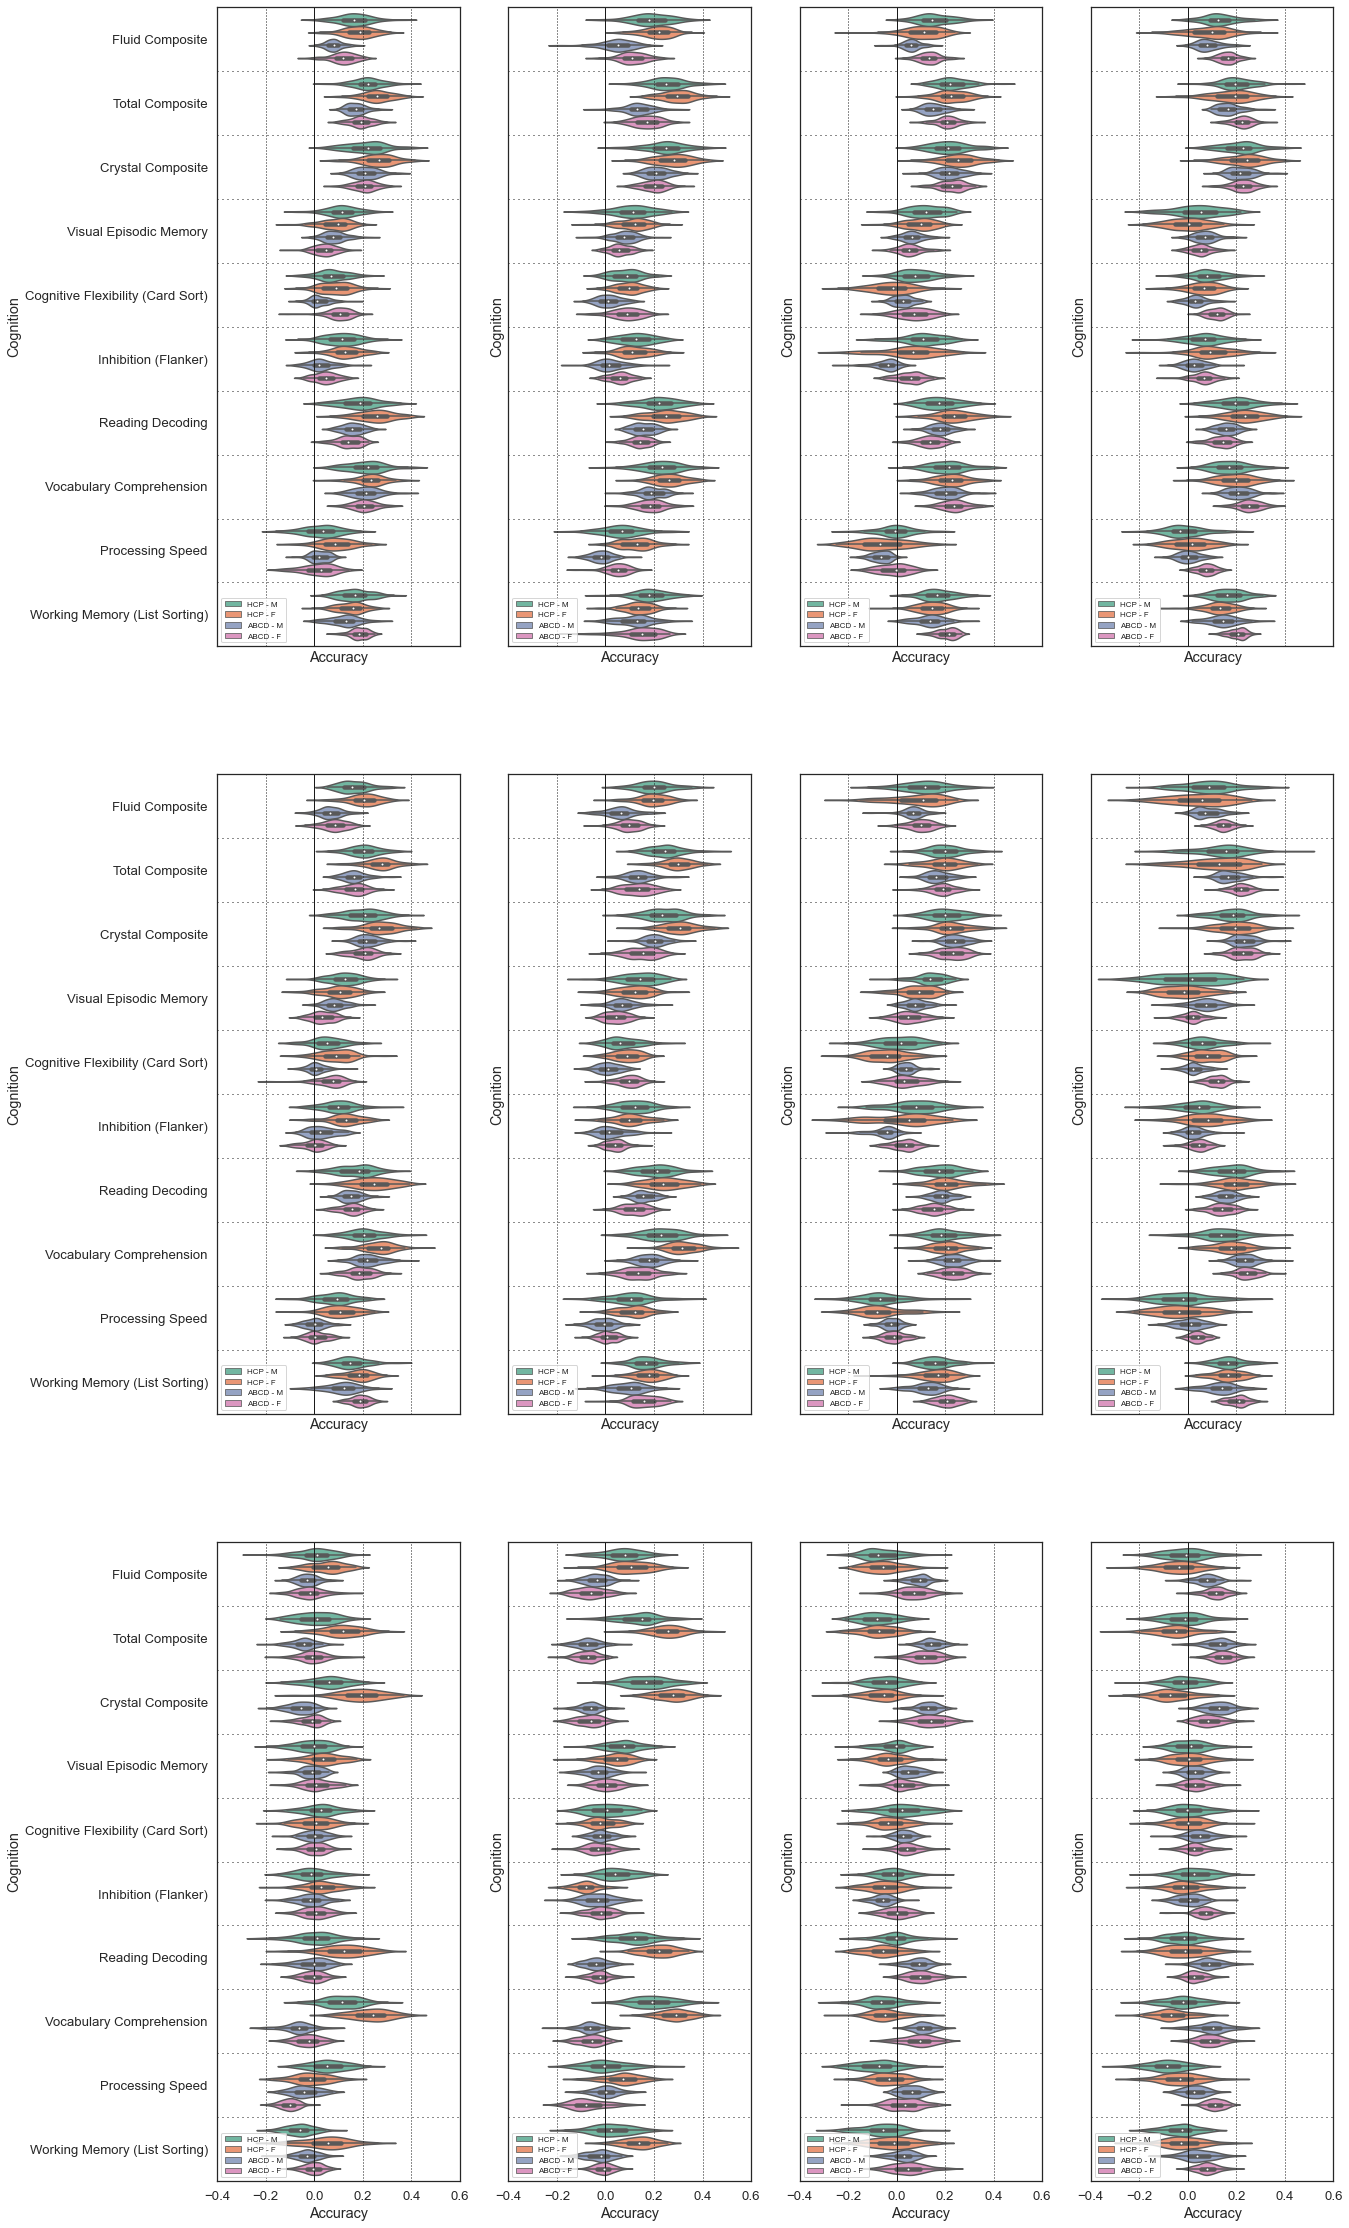

In [16]:
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, sharex=True, figsize=[20, 40])
sns.set_style(style="white")

cmap = 'Set2'
x = 'Accuracy'
y = 'Cognition'
hue = 'Test'
scale='width'
orient = 'h'


#ax[0] = sns.violinplot(ax=ax[0], x="acc", y="cog", hue="Sex", data=sa_df[sa_df.Parcellations=='Population-Level'], 
                       #split=True, scale="width", orient='h', palette='Set1')

ax[0,0] = sns.violinplot(ax=ax[0,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_results_ss[surfarea_results_ss.Train=='HCP - M'])

ax[0,1] = sns.violinplot(ax=ax[0,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_results_ss[surfarea_results_ss.Train=='HCP - F'])

ax[0,2] = sns.violinplot(ax=ax[0,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_results_ss[surfarea_results_ss.Train=='ABCD - M'])

ax[0,3] = sns.violinplot(ax=ax[0,3], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_results_ss[surfarea_results_ss.Train=='ABCD - F'])


ax[1,0] = sns.violinplot(ax=ax[1,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_results_ss[grayvol_results_ss.Train=='HCP - M'])

ax[1,1] = sns.violinplot(ax=ax[1,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_results_ss[grayvol_results_ss.Train=='HCP - F'])

ax[1,2] = sns.violinplot(ax=ax[1,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_results_ss[grayvol_results_ss.Train=='ABCD - M'])

ax[1,3] = sns.violinplot(ax=ax[1,3], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_results_ss[grayvol_results_ss.Train=='ABCD - F'])



ax[2,0] = sns.violinplot(ax=ax[2,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_results_ss[thick_results_ss.Train=='HCP - M'])

ax[2,1] = sns.violinplot(ax=ax[2,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_results_ss[thick_results_ss.Train=='HCP - F'])

ax[2,2] = sns.violinplot(ax=ax[2,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_results_ss[thick_results_ss.Train=='ABCD - M'])

ax[2,3] = sns.violinplot(ax=ax[2,3], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_results_ss[thick_results_ss.Train=='ABCD - F'])



#ax[0,0].set_title('HCP', fontsize=10)
#ax[0,1].set_title('ABCD', fontsize=10)


for i in range(nrows):
    for j in range(ncols):

        ax[i,j].axhline(0.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(1.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(2.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(3.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(4.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(5.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(6.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(7.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(8.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(9.5,  linewidth=1, color='k', dashes=(1, 4))
        
        ax[i,j].axvline(0.2,  linewidth=1, color='k', dashes=(1, 2))
        ax[i,j].axvline(-.2,  linewidth=1, color='k', dashes=(1, 2))
        ax[i,j].axvline(0.0,  linewidth=1, color='k', dashes=(1, 0))
        ax[i,j].axvline(0.4,  linewidth=1, color='k', dashes=(1, 2))
        #ax[i,j].xticks(labels, rotation='vertical')
        
        ax[i,j].legend(loc='lower left', fontsize=8)
        ax[i,j].set(xlim=(-0.4, 0.6))
        
        
#plt.savefig(os.path.join(base_dir, 'temp.png'), dpi=300, bbox_inches="tight") 


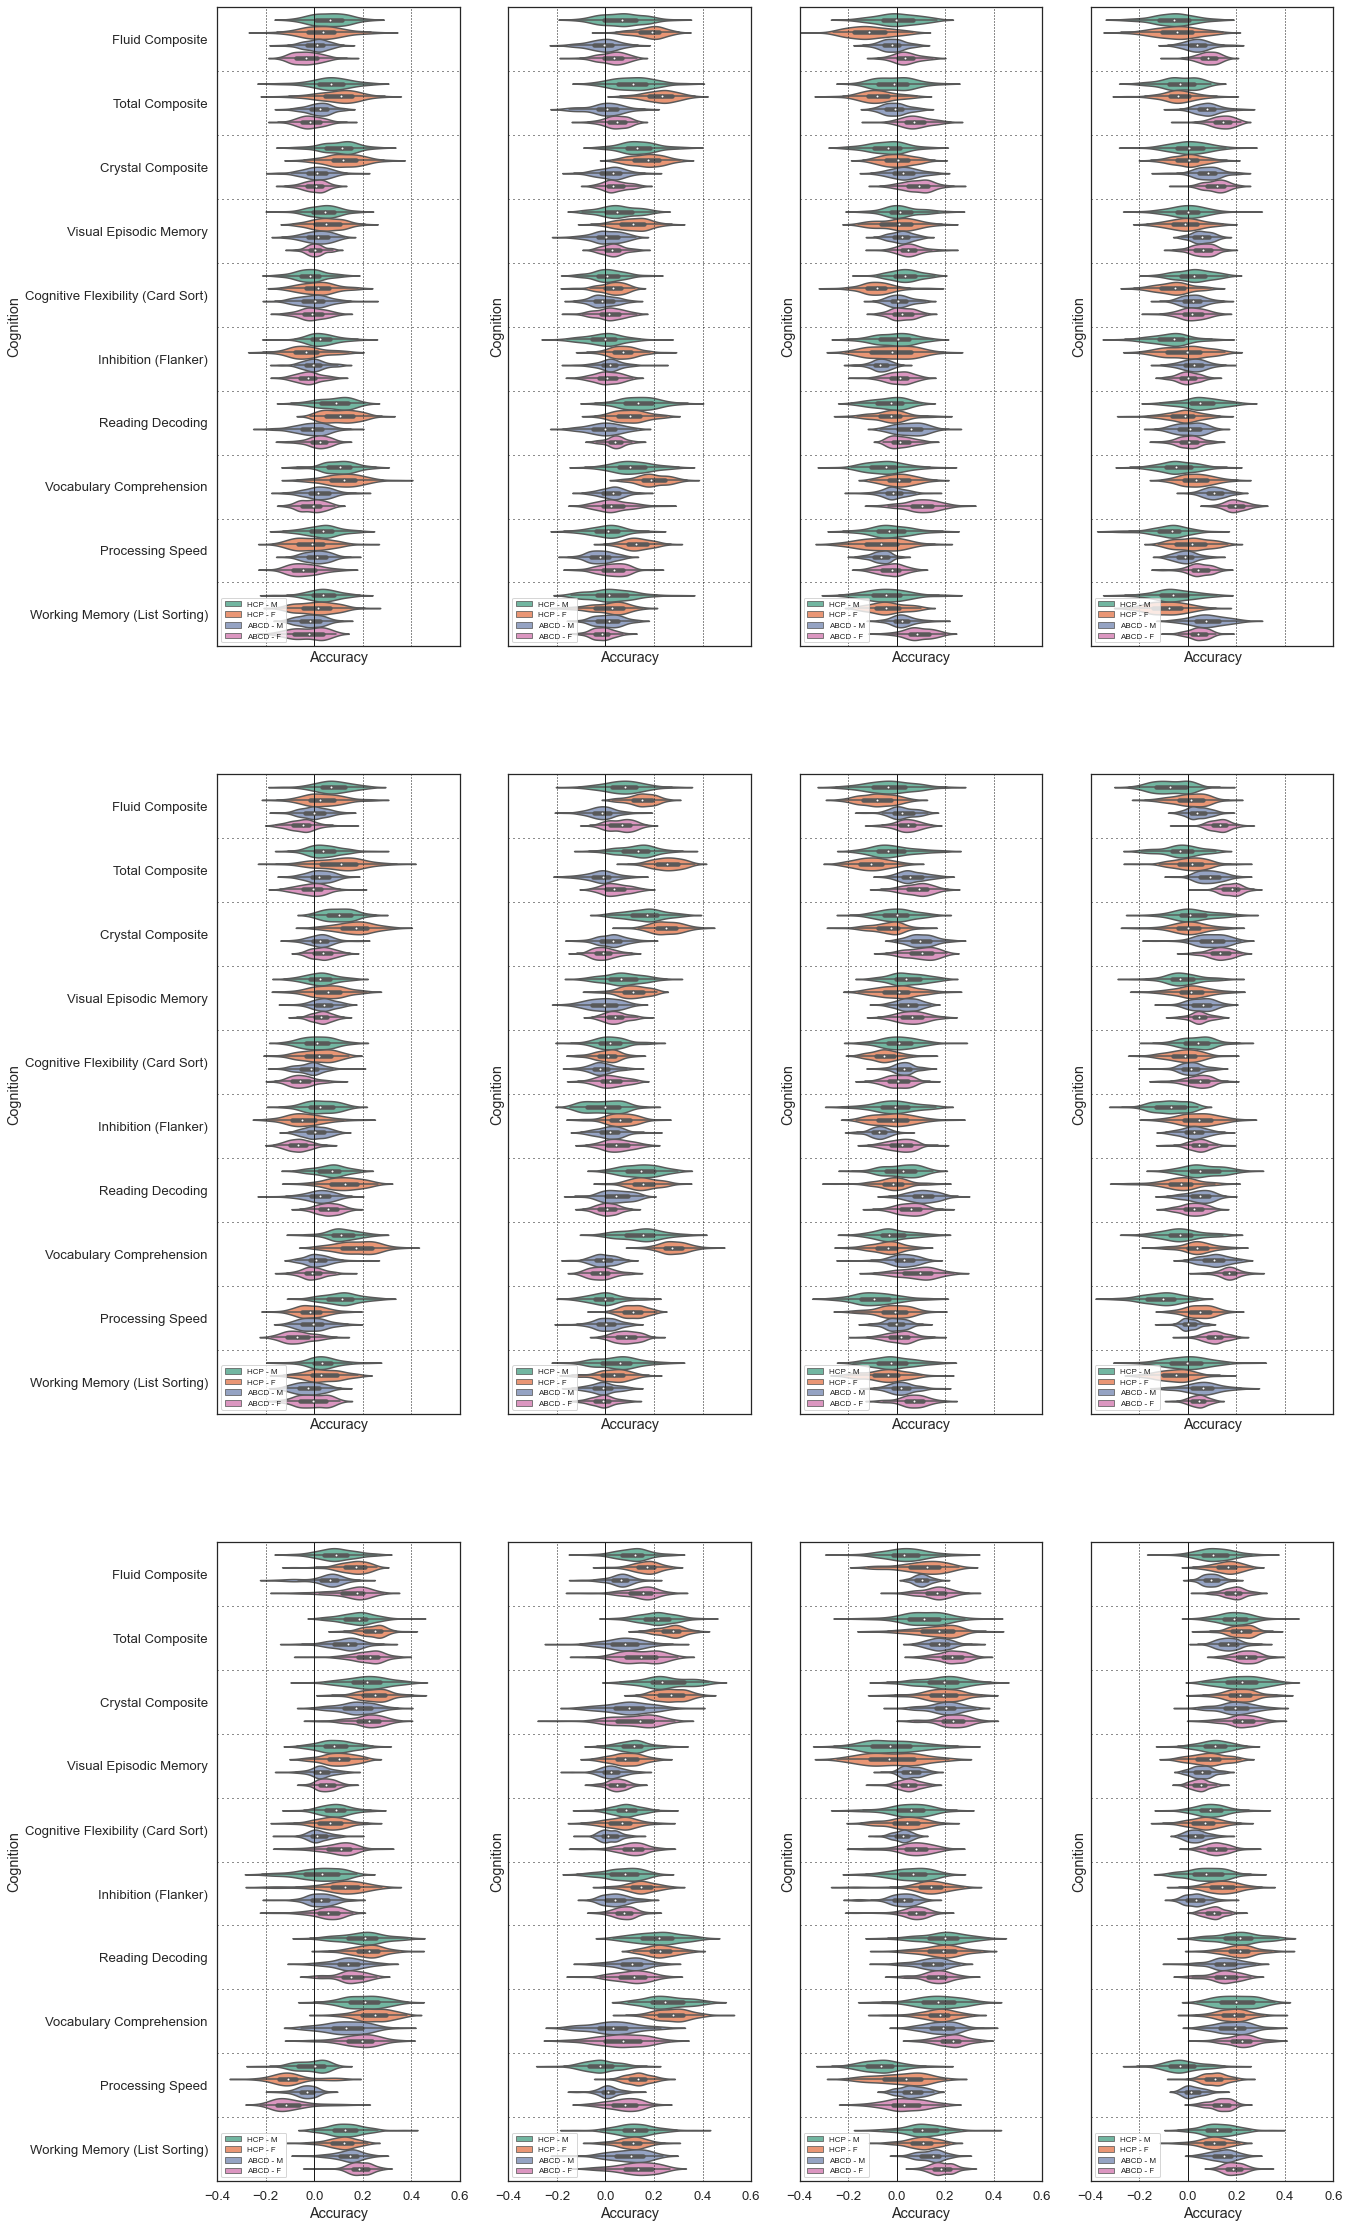

In [17]:
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, sharex=True, figsize=[20, 40])
sns.set_style(style="white")

cmap = 'Set2'
x = 'Accuracy'
y = 'Cognition'
hue = 'Test'
scale='width'
orient = 'h'

#ax[0] = sns.violinplot(ax=ax[0], x="acc", y="cog", hue="Sex", data=sa_df[sa_df.Parcellations=='Population-Level'], 
                       #split=True, scale="width", orient='h', palette='Set1')

ax[0,0] = sns.violinplot(ax=ax[0,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_norm_results_ss[surfarea_norm_results_ss.Train=='HCP - M'])

ax[0,1] = sns.violinplot(ax=ax[0,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_norm_results_ss[surfarea_norm_results_ss.Train=='HCP - F'])

ax[0,2] = sns.violinplot(ax=ax[0,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_norm_results_ss[surfarea_norm_results_ss.Train=='ABCD - M'])

ax[0,3] = sns.violinplot(ax=ax[0,3], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=surfarea_norm_results_ss[surfarea_norm_results_ss.Train=='ABCD - F'])


ax[1,0] = sns.violinplot(ax=ax[1,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_norm_results_ss[grayvol_norm_results_ss.Train=='HCP - M'])

ax[1,1] = sns.violinplot(ax=ax[1,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_norm_results_ss[grayvol_norm_results_ss.Train=='HCP - F'])

ax[1,2] = sns.violinplot(ax=ax[1,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_norm_results_ss[grayvol_norm_results_ss.Train=='ABCD - M'])

ax[1,3] = sns.violinplot(ax=ax[1,3], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=grayvol_norm_results_ss[grayvol_norm_results_ss.Train=='ABCD - F'])



ax[2,0] = sns.violinplot(ax=ax[2,0], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_norm_results_ss[thick_norm_results_ss.Train=='HCP - M'])

ax[2,1] = sns.violinplot(ax=ax[2,1], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_norm_results_ss[thick_norm_results_ss.Train=='HCP - F'])

ax[2,2] = sns.violinplot(ax=ax[2,2], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_norm_results_ss[thick_norm_results_ss.Train=='ABCD - M'])

ax[2,3] = sns.violinplot(ax=ax[2,3], x=x, y=y, hue=hue, scale=scale, orient=orient, palette=cmap,
                       data=thick_norm_results_ss[thick_norm_results_ss.Train=='ABCD - F'])



#ax[0,0].set_title('HCP', fontsize=10)
#ax[0,1].set_title('ABCD', fontsize=10)


for i in range(nrows):
    for j in range(ncols):

        ax[i,j].axhline(0.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(1.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(2.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(3.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(4.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(5.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(6.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(7.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(8.5,  linewidth=1, color='k', dashes=(1, 4))
        ax[i,j].axhline(9.5,  linewidth=1, color='k', dashes=(1, 4))
        
        ax[i,j].axvline(0.2,  linewidth=1, color='k', dashes=(1, 2))
        ax[i,j].axvline(-.2,  linewidth=1, color='k', dashes=(1, 2))
        ax[i,j].axvline(0.0,  linewidth=1, color='k', dashes=(1, 0))
        ax[i,j].axvline(0.4,  linewidth=1, color='k', dashes=(1, 2))
        #ax[i,j].xticks(labels, rotation='vertical')
        
        ax[i,j].legend(loc='lower left', fontsize=8)
        ax[i,j].set(xlim=(-0.4, 0.6))
        
        
#plt.savefig(os.path.join(base_dir, 'temp.png'), dpi=300, bbox_inches="tight") 


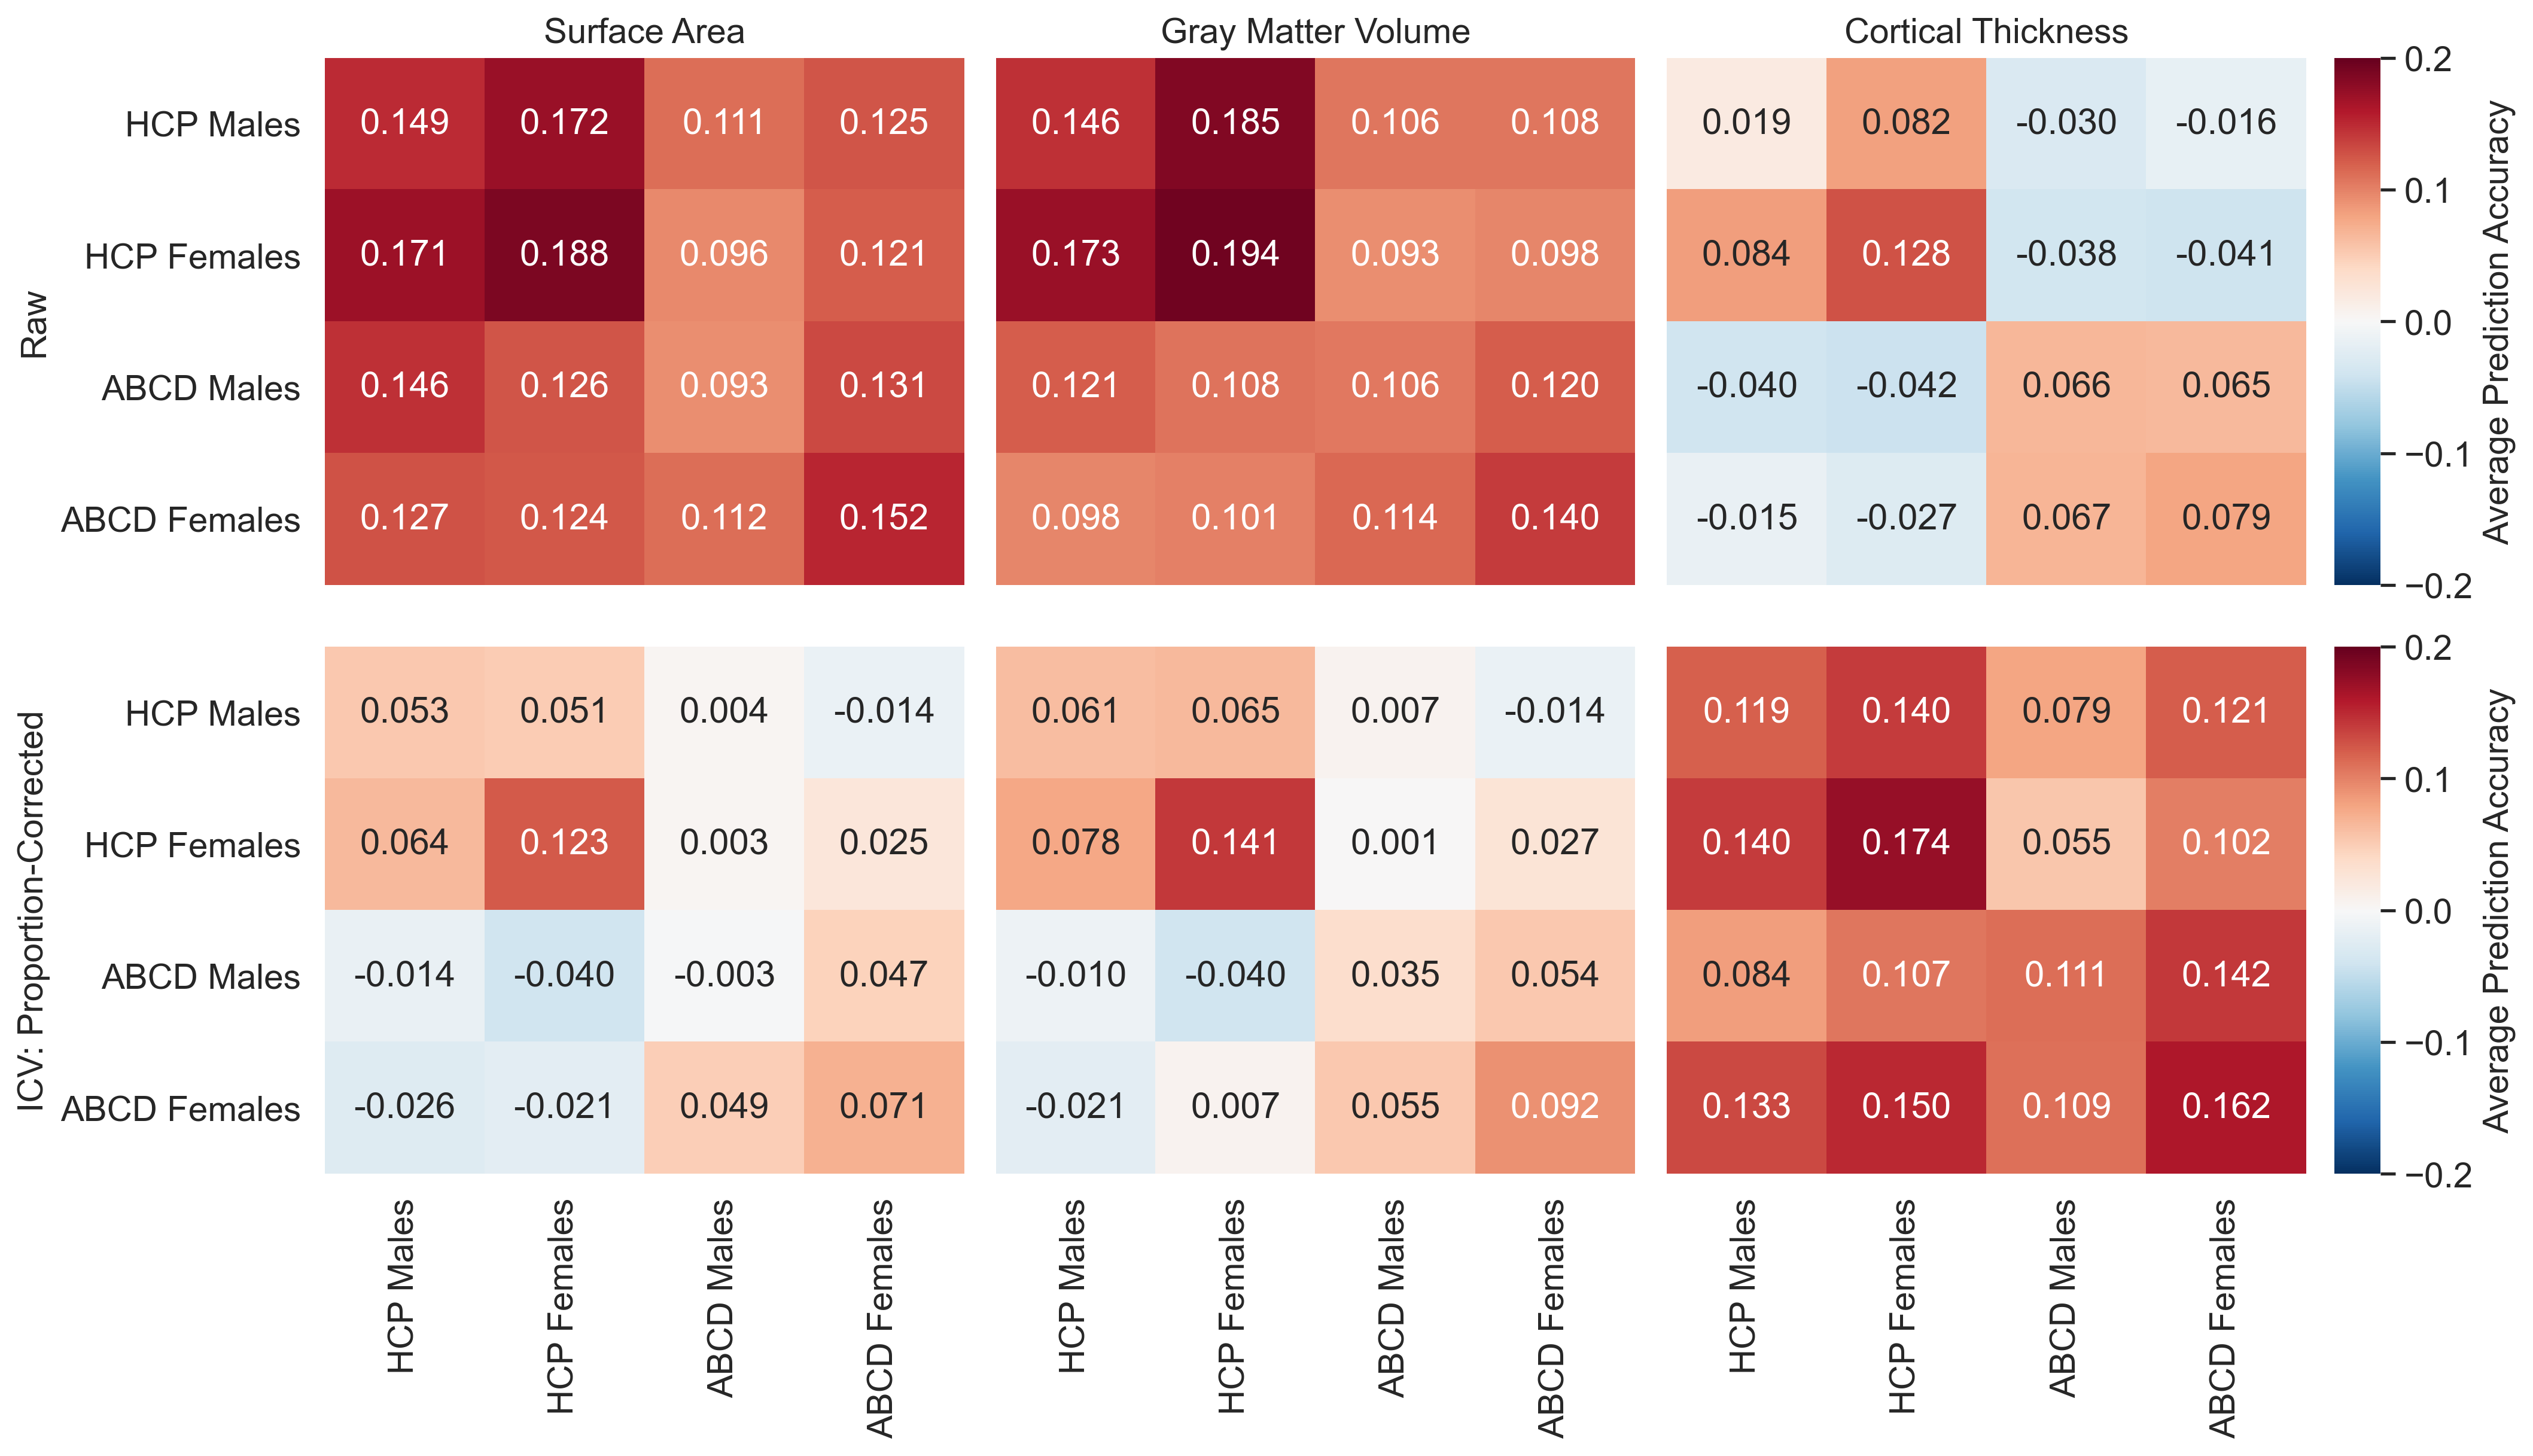

In [70]:
#plot heatmaps that demonstrate mean prediction accuracy across all cognitive scores for different train/test sets
#also shows results for without (top row) and with (bottom row) ICV norm

vmin = -0.2
vmax = 0.2
cmap = 'RdBu_r'
annot = True
dpi = 300
fmt= '.3f'
xticklabels = False
labels = ['HCP Males', 'HCP Females', 'ABCD Males', 'ABCD Females']
ticks = [-.2, -.1, 0, .1, .2]
cbar = False
tight = True
cbar_kws = {"orientation": "vertical", "ticks": ticks}


data1 = avg_surfarea_ss
data2 = avg_grayvol_ss
data3 = avg_thick_ss

data4 = avg_surfarea_norm_ss
data5 = avg_grayvol_norm_ss
data6 = avg_thick_norm_ss

fig, ax = plt.subplots(nrows=2, ncols=3, gridspec_kw={'width_ratios': [1, 1, 1]}, 
                       sharex=True, sharey=True, figsize=[14, 8], dpi=dpi, constrained_layout=tight)
sns.set_style(style="white")
ax[0,0] = sns.heatmap(data1, ax=ax[0,0], cbar=cbar, cmap=cmap, xticklabels=xticklabels, vmin=vmin, 
                      vmax=vmax, annot=annot, fmt=fmt, yticklabels=labels)
ax[0,1] = sns.heatmap(data2, ax=ax[0,1], cbar=cbar, cmap=cmap, xticklabels=xticklabels, vmin=vmin, 
                      vmax=vmax, annot=annot, fmt=fmt, yticklabels=labels)
ax[0,2] = sns.heatmap(data3, ax=ax[0,2], cbar=True, cbar_kws=cbar_kws, yticklabels=labels,
                      cmap=cmap, xticklabels=xticklabels, vmin=vmin, vmax=vmax, annot=annot, fmt=fmt)

ax[1,0] = sns.heatmap(data4, ax=ax[1,0], cbar=cbar, cmap=cmap, vmin=vmin, vmax=vmax, 
                      annot=annot, fmt=fmt, xticklabels=labels, yticklabels=labels)
ax[1,1] = sns.heatmap(data5, ax=ax[1,1], cbar=cbar, cmap=cmap, vmin=vmin, vmax=vmax, 
                      annot=annot, fmt=fmt, xticklabels=labels, yticklabels=labels)
ax[1,2] = sns.heatmap(data6, ax=ax[1,2], cbar=True, cbar_kws=cbar_kws, yticklabels=labels,
                      cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=fmt, xticklabels=labels)


fontsize=14

ax[0,0].set_title('Surface Area', fontsize=fontsize)
ax[0,1].set_title('Gray Matter Volume', fontsize=fontsize)
ax[0,2].set_title('Cortical Thickness', fontsize=fontsize)
ax[1,0].tick_params(axis="x", labelsize=fontsize, rotation=90) 
ax[1,1].tick_params(axis="x", labelsize=fontsize, rotation=90)
ax[1,2].tick_params(axis="x", labelsize=fontsize, rotation=90) 
ax[0,0].tick_params(axis="y", labelsize=fontsize, rotation=0)
ax[1,0].tick_params(axis="y", labelsize=fontsize, rotation=0)
ax[0,0].set_ylabel('Raw', fontsize=fontsize)
ax[1,0].set_ylabel('ICV: Proportion-Corrected', fontsize=fontsize)
#ax[1,1].set_xlabel('Test', fontsize=fontsize)
cbar1 = ax[0,2].collections[0].colorbar
# here set the labelsize by 20
cbar1.ax.tick_params(labelsize=fontsize, which='major')
cbar1.set_label("Average Prediction Accuracy",fontsize=fontsize)


cbar2 = ax[1,2].collections[0].colorbar
# here set the labelsize by 20
cbar2.ax.tick_params(labelsize=fontsize, which='major')
cbar2.set_label("Average Prediction Accuracy",fontsize=fontsize)


plt.savefig(os.path.join(base_dir, 'manuscript_figs/avgpreds_ss.png'), dpi=900, bbox_inches="tight") 


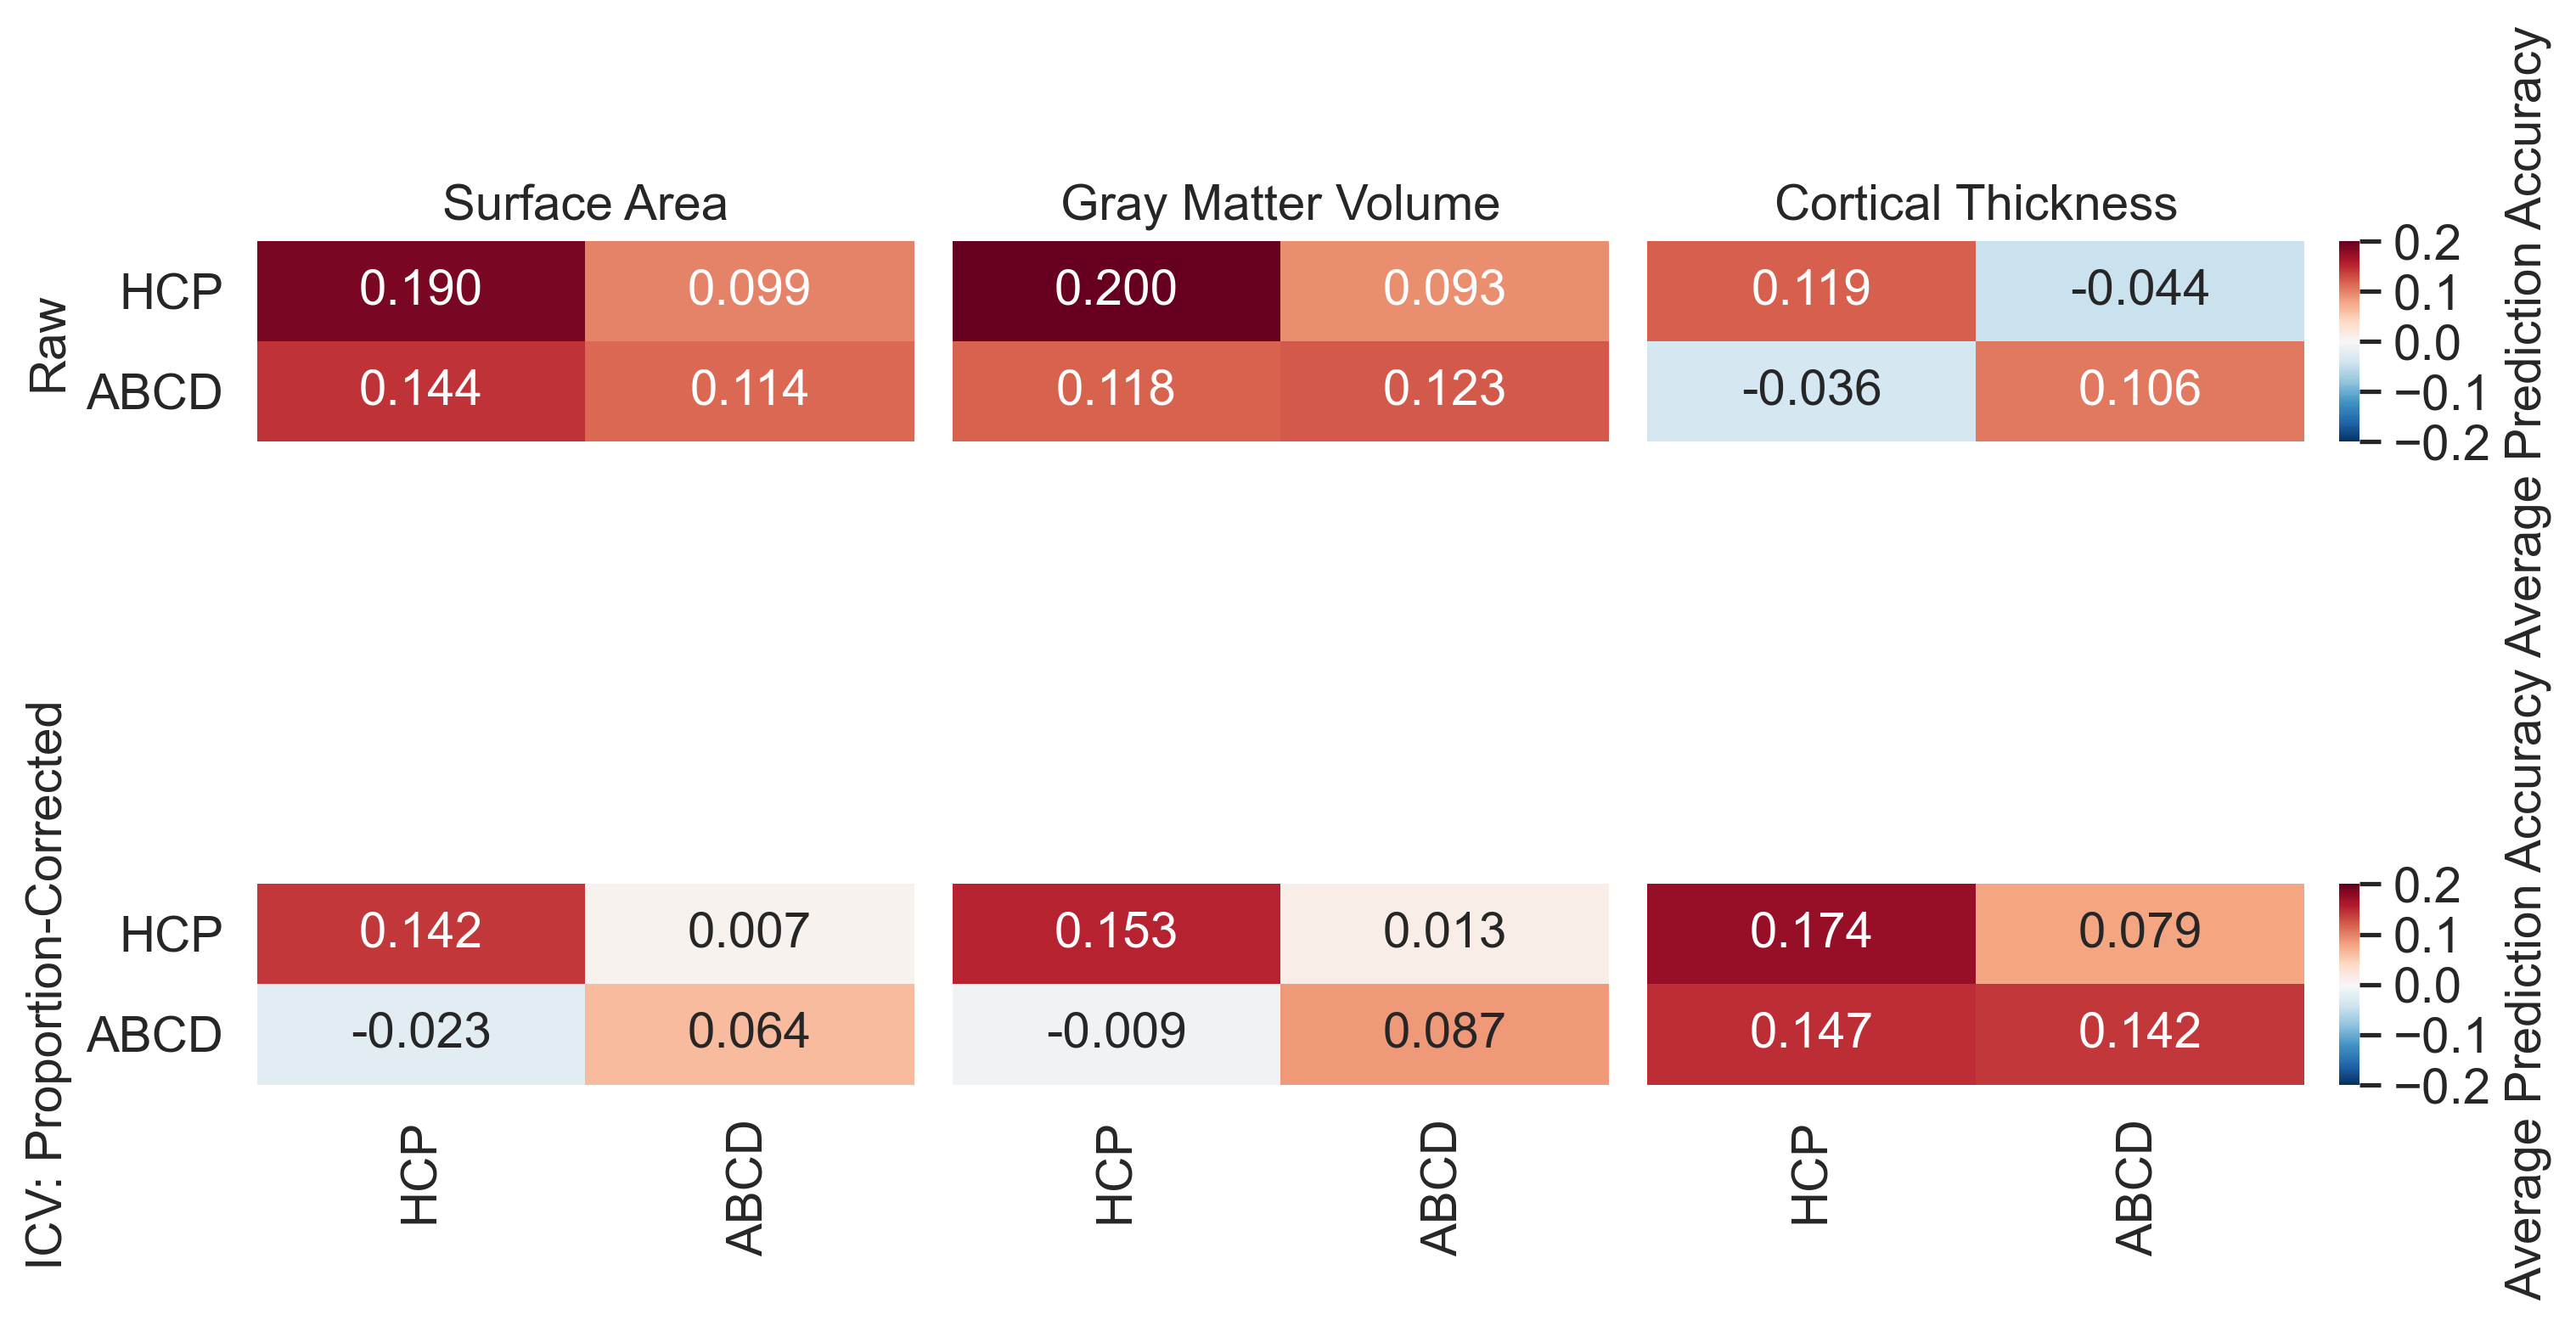

In [69]:
#plot heatmaps that demonstrate mean prediction accuracy across all cognitive scores for different train/test sets
#also shows results for without (top row) and with (bottom row) ICV norm

vmin = -0.2
vmax = 0.2
cmap = 'RdBu_r'
annot = True
dpi = 300
fmt= '.3f'
xticklabels = False
labels = ['HCP', 'ABCD']
ticks = [-.2, -.1, 0, .1, .2]
cbar = False
tight = True
cbar_kws = {"orientation": "vertical", "ticks": ticks}

annot_kws={"size": 14}


data1 = avg_surfarea_si
data2 = avg_grayvol_si
data3 = avg_thick_si

data4 = avg_surfarea_norm_si
data5 = avg_grayvol_norm_si
data6 = avg_thick_norm_si

fig, ax = plt.subplots(nrows=2, ncols=3, gridspec_kw={'width_ratios': [1, 1, 1]}, 
                       sharex=True, sharey=True, figsize=[10, 5], dpi=dpi, constrained_layout=tight)
sns.set_style(style="white")
ax[0,0] = sns.heatmap(data1, ax=ax[0,0], cbar=cbar, cmap=cmap, xticklabels=xticklabels, vmin=vmin, 
                      vmax=vmax, annot=annot, fmt=fmt, yticklabels=labels, annot_kws=annot_kws)
ax[0,1] = sns.heatmap(data2, ax=ax[0,1], cbar=cbar, cmap=cmap, xticklabels=xticklabels, vmin=vmin, 
                      vmax=vmax, annot=annot, fmt=fmt, yticklabels=labels, annot_kws=annot_kws)
ax[0,2] = sns.heatmap(data3, ax=ax[0,2], cbar=True, cbar_kws=cbar_kws, yticklabels=labels,
                      cmap=cmap, xticklabels=xticklabels, vmin=vmin, vmax=vmax, annot=annot, fmt=fmt, annot_kws=annot_kws)

ax[1,0] = sns.heatmap(data4, ax=ax[1,0], cbar=cbar, cmap=cmap, vmin=vmin, vmax=vmax, 
                      annot=annot, fmt=fmt, xticklabels=labels, yticklabels=labels, annot_kws=annot_kws)
ax[1,1] = sns.heatmap(data5, ax=ax[1,1], cbar=cbar, cmap=cmap, vmin=vmin, vmax=vmax, 
                      annot=annot, fmt=fmt, xticklabels=labels, yticklabels=labels, annot_kws=annot_kws)
ax[1,2] = sns.heatmap(data6, ax=ax[1,2], cbar=True, cbar_kws=cbar_kws, yticklabels=labels,
                      cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=fmt, xticklabels=labels, annot_kws=annot_kws)


fontsize=14

ax[0,0].set_title('Surface Area', fontsize=fontsize)
ax[0,1].set_title('Gray Matter Volume', fontsize=fontsize)
ax[0,2].set_title('Cortical Thickness', fontsize=fontsize)
ax[1,0].tick_params(axis="x", labelsize=fontsize, rotation=90) 
ax[1,1].tick_params(axis="x", labelsize=fontsize, rotation=90)
ax[1,2].tick_params(axis="x", labelsize=fontsize, rotation=90) 
ax[0,0].tick_params(axis="y", labelsize=fontsize, rotation=0)
ax[1,0].tick_params(axis="y", labelsize=fontsize, rotation=0)
ax[0,0].set_ylabel('Raw', fontsize=fontsize)
ax[1,0].set_ylabel('ICV: Proportion-Corrected', fontsize=fontsize)
#ax[1,1].set_xlabel('Test', fontsize=fontsize)
cbar1 = ax[0,2].collections[0].colorbar
# here set the labelsize by 20
cbar1.ax.tick_params(labelsize=fontsize, which='major')
cbar1.set_label("Average Prediction Accuracy",fontsize=fontsize)


cbar2 = ax[1,2].collections[0].colorbar
# here set the labelsize by 20
cbar2.ax.tick_params(labelsize=fontsize, which='major')
cbar2.set_label("Average Prediction Accuracy",fontsize=fontsize)


plt.savefig(os.path.join(base_dir, 'manuscript_figs/avgpreds_si.png'), dpi=900, bbox_inches="tight") 